# Project One

## Introduction

The New York City Public School system is the largest public school system in the United States (Cowen & Winters, 2012). As such, large datasets are compiled every year in order to facilitate the best possible education for all New York City public school students. The data being used in this project is compiled from 1270 New York City public schools that serve students from Kindergarten to grade 12 in 2016. The dataset contains information on schools, their location, the background of their students, how they perform on New York State standardized tests, and more. All data is based on averages among each school, and is publicly available. It is compiled by PASSNYC, a non-profit organization dedicated to broadening educational opportunities for New York City students (PASSNYC, n.d.).

In this project, the PASSNYC data is being used to answer the question "Which factors influence chronic absenteeism in public schools?". This is a pertinent question for today's schools. Only recently, in 2016, did the US Department of Education release data for chronic absenteeism. It has not been tracked in aggregate so there is little research available to understand chronic absenteeism. Much of the current research on the topic is about its effects on students. Gottfried found that chronic absenteeism negatively impacts educational and social engagement (Gottfried, 2014). Additionally, chronic absenteeism has been found to have a strong positive relationship with psychiatric comorbidities such as anxiety disorders and substance abuse (Kiani, Otero, Taufique, & Ivanov, 2018). While understanding the effects of chronic absenteeism is important, it is not very useful in determining solutions to the problem. This paper instead aims to explore the connections among potential contributors to chronic absenteeism and the phenomenon of chronic absenteeism itself.

Chronic absenteeism is a national problem and has affected New York City public school students significantly. Approximately one in five students in New York City is chronically absent and seventy nine percent of children in the juvenile justice system have had a history of chronic absenteeism preceding arrest (Balfanz & Byrnes, 2013, p.5). Programs to combat chronic absenteeism in New York City have been implemented before this data came out in 2016. They were successful in reducing chronic absenteeism through programs that included mentorship, personalized support to children and their families, and connecting community-level resources to those in the public schools (Balfanz & Byrnes, 2013, p.2). With this data on the success of programs, it is vital to examine which variables have the largest link with chronic absenteeism to allow for better outcomes for students.

Through summary statistical analysis, geospatial data analysis, regression analysis, and various visuals, this paper has shown that economic status is one of the most important factors in chronic absenteeism. Schools with higher economic need have shown to have generally higher rates of chronic absenteeism possibly due to factors such as the need to take care of a dependent, a need to attend work instead of school, or little resources available to help parents. It was also revealed that in places that have high amounts of school bus delays per capita, economic need is even more of a factor in chronic absenteeism. This could be due to the fact that transportation difficulties and economic need combine to be more of a factor in chronic absenteeism. Moreover, academic success has been found to be a significant factor in chronic absenteeism. However, this finding is tempered by the fact that this relationship could be indicative of reverse causality, with chronic absenteeism causing lower academic success. Further, it was revealed that crime holds a weak relationship with chronic absenteeism. This is important because crime and economic need have been shown to have a positive relationship with each other in prior studies (Imran, Hosen, & Chowdry, 2018). Being able to distinguish that crime is not a factor in chronic absenteeism opened the door for data more specifically related to chronic absenteeism to be added. Such data included the population to school ratio, population density of each zip code, as well as labor statistics. The population to school ratio revealed a negative relationship with chronic absenteeism, suggesting that larger schools allocate more funds to battle chronic absenteeism. The population density and labor statistics further supported the notion that economic need has a strong relationship with chronic absenteeism. Additionally, it was revealed that certain boroughs of New York City have higher rates of chronic absenteeism. The boroughs that have higher economic need reflect higher chronic absenteeism, further supporting the positive relationship between chronic absenteeism and economic status.

## Data

All New York City public schools are included in the dataset. This means in the original dataset there was information on 1,273 schools within the New York City limits. However, seventy three schools were dropped from the dataset as they did not contain information on the dependent variable, the percent of students chronically absent. This variable measures the percentage of students in every school that miss ten percent of school days or more in a given school year. The independent variables being used in this project are an economic need index, average ELA proficiency, average math proficiency, trust percentage, strong family-community ties percentage, unemployment rate, labor force participation rate, violent crime, non-violent crime, population, and school bus delays. The economic need index is a number 0-1 with the lowest amount of economic need being 0 and highest being 1. It is calculated using a formula including the percentage of students in temporary housing, eligibility for HRA, a New York City social services program, and amount of reduced cost lunch provided to students with low income. Additionally, this project is using the average ELA and Math proficiency for each school. This is measured through New York State standardized testing where anything above a score of 3 is considered proficient. The ELA and Math proficiencies for each school present the opportunity for a possible reverse causality effect. Poor academic performance could influence a student to come to school less, but also coming to school less could lead to lower academic performance. Trust percentage is a survey-based statistic that reflects if relationships between students, families, and teachers are based on respect and trust. Similarly, the strong family-community ties percentage is a rating that reflects how well the school forms partnerships with families and the community it serves.

Being added to the dataset, violent and non-violent crime data will allow for analysis on causes of chronic absenteeism. Since crime and economic need have been proven to have a positive relationship (Imran, Hosen, & Chowdry, 2018), the need to distinguish which one could be causing chronic absenteeism is crucial for determining which factors influence chronic absenteeism. Additionally, previous research has shown that children who experience neighborhood violence tend to have higher rates of chronic absenteeism (Stempel, Cox-Martin, Bronsert, Dickinson, & Allison, 2017). Therefore, localized crime data being added for analysis is helpful to explore another possible factor in chronic absenteeism.

The population, population density, and labor market statistics by zip code are also added to the original data. The population levels of each zip code allow for a new variable to be created called the population to school ratio. This ratio measures the amount of people each school serves, on average, in each zip code. This ratio could be improved by analyzing the district enrollment to school ratio instead. However, due to the constraints on web scraping, this was not possible for this project. Population density offers a glimpse into if students need to travel far to attend school. This could cause absenteeism as travel hardships hinder a student's ability to attend school. Labor market statistics offer another way of looking at economic need, examining income on the lowest end of the spectrum. This is because those who are unemployed have zero income. Additionally, school bus delay data is added to the dataset. This dataset reveals school bus delays by borough. Experiencing frequent transportation delays can significantly increase the challenges and costs associated with getting to school for students. Those who endure extended wait times may be at a higher risk of missing school due to other responsibilities like work, medical appointments, and familial obligations.

Utilizing these variables allow the project to come closer to obtaining a more complete picture of a student's background. This is very helpful in determining the factors that cause chronic absenteeism and supporting the main message of the paper: that schools with significant transportation delays experience a stronger impact of economic need on chronic absenteeism compared to schools with fewer transportation delays.

## Data Cleaning/Loading

In [2]:
#import all packages needed
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline
from scipy import stats
from pandas.plotting import table
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import Divider, Size
from matplotlib.patches import Patch
import requests
from matplotlib import gridspec
import requests
from bs4 import BeautifulSoup
import time
!pip install stargazer
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from shapely import wkt
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

  Using cached stargazer-0.0.7-py3-none-any.whl.metadata (6.3 kB)
Using cached stargazer-0.0.7-py3-none-any.whl (15 kB)


In [3]:
#read in data
df = pd.read_csv('2016 School Explorer.csv')

In [4]:
#define relevant columns
relevant_columns = ['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent', 'Zip']

In [5]:
#replace "N/A" to a null variable
df.replace('N/A', np.nan, inplace=True)

#delete rows with null variables in relevant columns
df.dropna(subset=relevant_columns, inplace=True)

columns_to_change = ['Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']

#convert columns to float values
df[columns_to_change] = df[columns_to_change].apply(lambda x: x.str.rstrip('%').astype('float') / 100.0)

#filter out Y variable observations that are misentered
df = df[df['Percent of Students Chronically Absent'] != 1.0]

In [6]:
# clean violent crime data
# Define the list of numbers
pct_numbers = [1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 83, 84, 88, 90, 94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123]

# Read the CSV file with header set to the third row
violent_crime_data = pd.read_csv('Copy of seven-major-felony-offenses-by-precinct-2000-2022.csv', header=2)

# Filter the DataFrame to keep only the rows where the "CRIME" column is "TOTAL SEVEN MAJOR FELONY OFFENSES"
df_crime = violent_crime_data[violent_crime_data['CRIME'] == 'TOTAL SEVEN MAJOR FELONY OFFENSES']

# Reset the index of the DataFrame
df_crime.reset_index(drop=True, inplace=True)

# Create a new "PCT" column filled with the provided list of numbers
df_crime.loc[:, 'PCT'] = pct_numbers * (len(df_crime) // len(pct_numbers)) + pct_numbers[:len(df_crime) % len(pct_numbers)]

# Select only the "PCT", "CRIME", and "2016" columns
df_crime = df_crime[['PCT', 'CRIME', '2016']]

# Drop the last row
df_crime.drop(df_crime.index[-1], inplace=True)

In [7]:
#Clean non - violent crime data
# Define the list of numbers
pct_numbers = [1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 83, 84, 88, 90, 94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123]

# Read the CSV file with header set to the third row
nonviolent_crime_data = pd.read_csv('Copy of non-seven-major-felony-offenses-by-precinct-2000-2022.csv', header=2)

# Filter the DataFrame to keep only the rows where the "CRIME" column is "TOTAL NON-SEVEN MAJOR FELONY OFFENSES"
df_crime_novi = nonviolent_crime_data[nonviolent_crime_data['CRIME'] == 'TOTAL NON-SEVEN MAJOR FELONY OFFENSES']

# Reset the index of the DataFrame
df_crime_novi.reset_index(drop=True, inplace=True)

# Create a new "PCT" column filled with the provided list of numbers
df_crime_novi.loc[:, 'PCT'] = pct_numbers * (len(df_crime_novi) // len(pct_numbers)) + pct_numbers[:len(df_crime_novi) % len(pct_numbers)]

# Select only the "PCT", "CRIME", and "2016" columns
df_crime_novi = df_crime_novi[['PCT', 'CRIME', '2016']]

# Drop the last row
df_crime_novi.drop(df_crime_novi.index[-1], inplace=True)

Sixty one rows were dropped from the original dataset because they did not contain data for chronic absence rate, the dependent variable. Without data on the dependent variable, the schools cannot be analyzed for this research question. Additionally, there were outliers in chronic absence rates that reflected schools with one hundred percent of their student body being chronically absent. Based on further inspection, the attendance rate for all these schools are listed as 0, meaning the data was misentered and has been removed.

## Summary Statistics Tables

In [8]:
#create table with all relevant variables
columnssss = df[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']]
relevant_columns_table = df[relevant_columns]

#change column names for table readability
relevant_columns_table1 = relevant_columns_table.rename(columns={'Economic Need Index': 'Econ Need', 
                                                                'Average ELA Proficiency': 'ELA Scores', 
                                                                'Average Math Proficiency': 'Math Scores', 
                                                                'Strong Family-Community Ties %': 'Fam-Com %', 
                                                                'Percent of Students Chronically Absent':'Absence Rate'})

#print table
title1= 'Summary Statistics for Chosen Variables'
print(title1)
relevant_columns_table1.describe().round(2)

Summary Statistics for Chosen Variables


,Econ Need,ELA Scores,Math Scores,Trust %,Fam-Com %,Absence Rate,Zip
count,1207.00,1207.00,1207.00,1207.00,1207.00,1207.00,1207.00
mean,0.67,2.53,2.66,0.90,0.83,0.21,10822.61
std,0.21,0.36,0.46,0.06,0.06,0.12,528.61
min,0.05,1.81,1.83,0.00,0.00,0.00,10001.00
25%,0.55,2.25,2.30,0.87,0.79,0.11,10453.00
50%,0.73,2.45,2.57,0.91,0.83,0.19,11203.00
75%,0.84,2.75,2.98,0.94,0.87,0.30,11233.00
max,0.96,3.93,4.19,1.00,0.99,0.74,11694.00


The economic need index's mean is sixty seven percent, meaning that on average, over half of New York City public schools students rely on some type of government assistance. This means that the school system in New York City serves many children from low income backgrounds. Additionally, over three fourths of students come from schools who score, on average, lower than proficient on state math and ELA exams. Both trust and family-community ties are strong at above eighty percent, on average. However, this could be the result of survey bias where only people involved in the school community respond, shifting the results. A quarter of New York City public schools report chronic absenteeism rates of thirty percent. This is much above the national average of sixteen percent (US Department of Education, n.d.).

In [9]:

summary_crime = df_crime.describe().round(2)
summary_crime_novi = df_crime_novi.describe().round(2)

# Concatenate the summary statistics horizontally
summary_combined = pd.concat([summary_crime, summary_crime_novi], axis=1)

# Add a suffix to columns to distinguish between the two datasets
summary_combined.columns = ['df_crime', 'df_crime_novi']

summary_combined.rename(columns={'df_crime': 'Violent Crime', 'df_crime_novi': 'Non-Violent Crime'}, inplace = True)
# Print or display the summary statistics
title = "Summary Statistics of Crime Data"
print(title)
summary_combined

Summary Statistics of Crime Data


,Violent Crime,Non-Violent Crime
count,77.00,77.00
mean,1314.38,753.06
std,572.42,404.98
min,79.00,6.00
25%,957.00,472.00
50%,1143.00,698.00
75%,1603.00,913.00
max,3287.00,2389.00


This data table shows summary statistics for precinct level violent and non-violent crime in New York City. On the surface, it looks like there is much more violent crime in the city. This can be observed through looking at the averages of both violent and non-violent crime, with there being over five hundred more violent crimes on average in each precinct. However, this data was obtained from the New York police department, which can only record crime that is reported to them. People would be much more likely to report a violent crime than a non-violent one, which could be skewing the data.

In [10]:
# Read in data
unemployment_df = pd.read_csv('ACSST5Y2016.S2301-Data.csv')

# Rename columns for clarity
unemployment_df = unemployment_df.rename(columns={
    'S2301_C02_001E': 'Labor Force Participation Rate',
    'S2301_C03_001E': 'Employment/Population Ratio',
    'S2301_C04_001E': 'Unemployment Rate',
    'NAME': 'Zip'
})

#create df
columns_useful = ['Zip', 'Labor Force Participation Rate', 'Employment/Population Ratio', 'Unemployment Rate']
unemployment_table = unemployment_df[columns_useful].copy()

df8 = df
df8['Zip'] = df8['Zip'].astype(str)

# Clean data
unemployment_table['Zip'] = unemployment_table['Zip'].str.replace('ZCTA5', '').str.strip()
unemployment_table = unemployment_table.drop(0, axis=0).reset_index(drop=True)

# Merge unemployment_table with df8
absenteeism_unemployment_table = pd.merge(unemployment_table, df8, on="Zip", how="inner")

# Select columns for summary statistics
c_use = ['Labor Force Participation Rate', 'Employment/Population Ratio', 'Unemployment Rate']
summary_unemployment = absenteeism_unemployment_table[c_use]

# Replace '-' with NaN and calculate summary statistics
summary_unemployment = summary_unemployment.replace('-', np.nan).astype(float).describe().round(2)
summary_unemployment

,Labor Force Participation Rate,Employment/Population Ratio,Unemployment Rate
count,1206.00,1206.00,1206.00
mean,62.27,56.25,9.75
std,6.05,6.53,3.45
min,46.40,41.60,1.30
25%,57.80,51.30,6.70
50%,61.90,55.20,9.40
75%,66.30,60.00,12.30
max,85.10,81.80,20.40


The data table above shows the labor force participation rate, employment to population ratio, and unemployment rate by zip code in New York City. As seen, it reveals a very high average unemployment rate of almost ten percent in the city. This could be due to the fact that the city was still in recovery from the 2008 financial crisis, which forced some large financial institutions based in New York City to go bankrupt and lay off many employees.

In [11]:
#read in url
web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# check for response and find rows in data
response = requests.get(web_url, headers=headers)
soup_object = BeautifulSoup(response.content, 'html.parser')
data_table = soup_object.find('table', {'class': 'ranklist'})
all_values = data_table.find_all('tr')

#create and populate dataframe
nyc_pop_df = pd.DataFrame(columns=['Rank', 'Zip', 'Population'])
for row in all_values[1:]:
    values = row.find_all('td')
    if len(values) >= 3:  # Ensure at least 3 columns are present
        Rank = values[0].text.strip()
        Zip = values[1].text.strip()
        Population = values[2].text.strip()
        nyc_pop_df = pd.concat([nyc_pop_df, pd.DataFrame({'Rank': [Rank], 'Zip': [Zip], 'Population': [Population]})], ignore_index=True)
        
#make sure there are no commas in data
nyc_pop_df['Population'] = nyc_pop_df['Population'].replace(',', '', regex=True)

#make sure theres no whitespace
nyc_pop_df['Zip'] = nyc_pop_df['Zip'].str.strip()
nyc_pop_df['Population'] = nyc_pop_df['Population'].str.strip()

#change to type float for both columns
nyc_pop_df['Zip'] = nyc_pop_df['Zip'].astype(int)
nyc_pop_df['Population'] = nyc_pop_df['Population'].astype(int)
nyc_pop_df = nyc_pop_df.drop(columns=['Rank'])

# zip code ranges
manhattan_zip_range = range(10001, 10283)  
staten_island_zip_range = range(10301, 10315) 
bronx_zip_range = range(10451, 10476) 
queens_zip_range = list(range(11004, 11110)) + list(range(11351, 11698)) 
brooklyn_zip_range = range(11201, 11257)

# Filter for only NYC
nyc_pop_df = nyc_pop_df[
    (nyc_pop_df['Zip'].isin(manhattan_zip_range)) |
    (nyc_pop_df['Zip'].isin(staten_island_zip_range)) |
    (nyc_pop_df['Zip'].isin(bronx_zip_range)) |
    (nyc_pop_df['Zip'].isin(queens_zip_range)) |
    (nyc_pop_df['Zip'].isin(brooklyn_zip_range))
]

#create bar plot to show chronic absence rates for each NYC borough
applicable_columns_table = df

def get_borough(zip_code):
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# Define the order of boroughs
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens']

# get new borough column 
applicable_columns_table.loc[:, 'Borough'] = applicable_columns_table['Zip'].apply(get_borough)

# Filter out Unknown borough
applicable_columns_table = applicable_columns_table[applicable_columns_table['Borough'] != 'Unknown']

# group by borough and get average chronic absence rates
grouped_data = applicable_columns_table.groupby('Borough')['Percent of Students Chronically Absent'].mean().reset_index()

#read in bus delay data
bus_delays = pd.read_csv('Bus_Breakdown_and_Delays_20240327.csv', dtype={'Informed_On': str}, low_memory=False)
bus_delays = bus_delays[bus_delays['Boro'].isin(['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island'])]
bus_delays = bus_delays[bus_delays['Number_Of_Students_On_The_Bus'] != 0]

# Define a function to extract numbers from a string using regex
def extract_numbers(text):
    numbers = re.findall(r'\d+', str(text))
    return int(numbers[0]) if numbers else 0

# Apply the function to the "How_Long_Delayed" column to keep only the numbers
bus_delays['How_Long_Delayed'] = bus_delays['How_Long_Delayed'].apply(extract_numbers)
bus_delays = bus_delays[bus_delays['How_Long_Delayed'] != 0]

borough_delays = bus_delays.groupby('Boro').size().reset_index(name='Delays')

# Rename the columns for clarity
borough_delays.columns = ['Borough', 'Delays']

# Sort the DataFrame by the number of delays in descending order
borough_delays = borough_delays.sort_values(by='Delays', ascending=False)

# Reset the index of the DataFrame
borough_delays.reset_index(drop=True, inplace=True)

# Define the function to map zip codes to boroughs
def get_borough(zip_code):
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# Apply the function to create a new column 'Borough' in nyc_pop_df
nyc_pop_df['Borough'] = nyc_pop_df['Zip'].apply(get_borough)

# Group by 'Borough' and sum the 'Population' column
nyc_boro_pop = nyc_pop_df.groupby('Borough')['Population'].sum().reset_index()

# Rename the columns for clarity
nyc_boro_pop.columns = ['Borough', 'Population']

# Display the new DataFrame
nyc_boro_pop_delay = pd.merge(borough_delays, nyc_boro_pop, on='Borough')

#clean table and create delays per capita column
nyc_boro_pop_delay['Delays per Capita'] = nyc_boro_pop_delay['Delays'] / nyc_boro_pop_delay['Population']
nyc_boro_pop_delay2 = pd.merge(nyc_boro_pop_delay, grouped_data, on="Borough")
nyc_boro_pop_delay2 = nyc_boro_pop_delay2.drop(columns=['Delays', 'Population'])
nyc_boro_pop_delay2['Delays per Capita'] = nyc_boro_pop_delay2['Delays per Capita'].round(3)
nyc_boro_pop_delay2['Percent of Students Chronically Absent'] = nyc_boro_pop_delay2['Percent of Students Chronically Absent'].round(3)
print('Summary Statistics for School Bus Delays and Chronic Absenteeism')
nyc_boro_pop_delay2

Summary Statistics for School Bus Delays and Chronic Absenteeism


,Borough,Delays per Capita,Percent of Students Chronically Absent
0,Bronx,0.044,0.273
1,Brooklyn,0.021,0.219
2,Manhattan,0.022,0.194
3,Queens,0.009,0.148
4,Staten Island,0.005,0.182


This table shows the amount of school bus delays per capita and chronic absenteeism by borough in New York City. The delays per capita statistic was obtained by dividing the amount of delays by the population of each borough. As such, this statistic represents the amount of school bus delays per person in the 2016 school year. As seen in the table, the Bronx has the highest amount of delays per capita, with Brooklyn and Queens reflecting an amount of delays per capita similar to each other. Finally, Queens and Staten Island have the least amount of delays per capita, although Queens has a rate double that of Staten Island. These statistics make sense, as delays can be caused by traffic, which is generally worse in the denser urban environments such as the Bronx, Brooklyn, and Manhattan. These delays also follow closely with chronic absenteeism, with the Bronx having the highest average chronic absenteeism rate, Brooklyn and Manhattan having similar rates, and Queens and Staten Island having the least. The table shows that chronic absenteeism is related to school bus delays, as boroughs with higher amounts of delays generally have higher amounts of chronic absenteeism. One possible reason for this could be that with a higher amount of delays, students find it more difficult and time consuming to get to school and consequently do not come as often. 

## Plots, Histograms, Figures

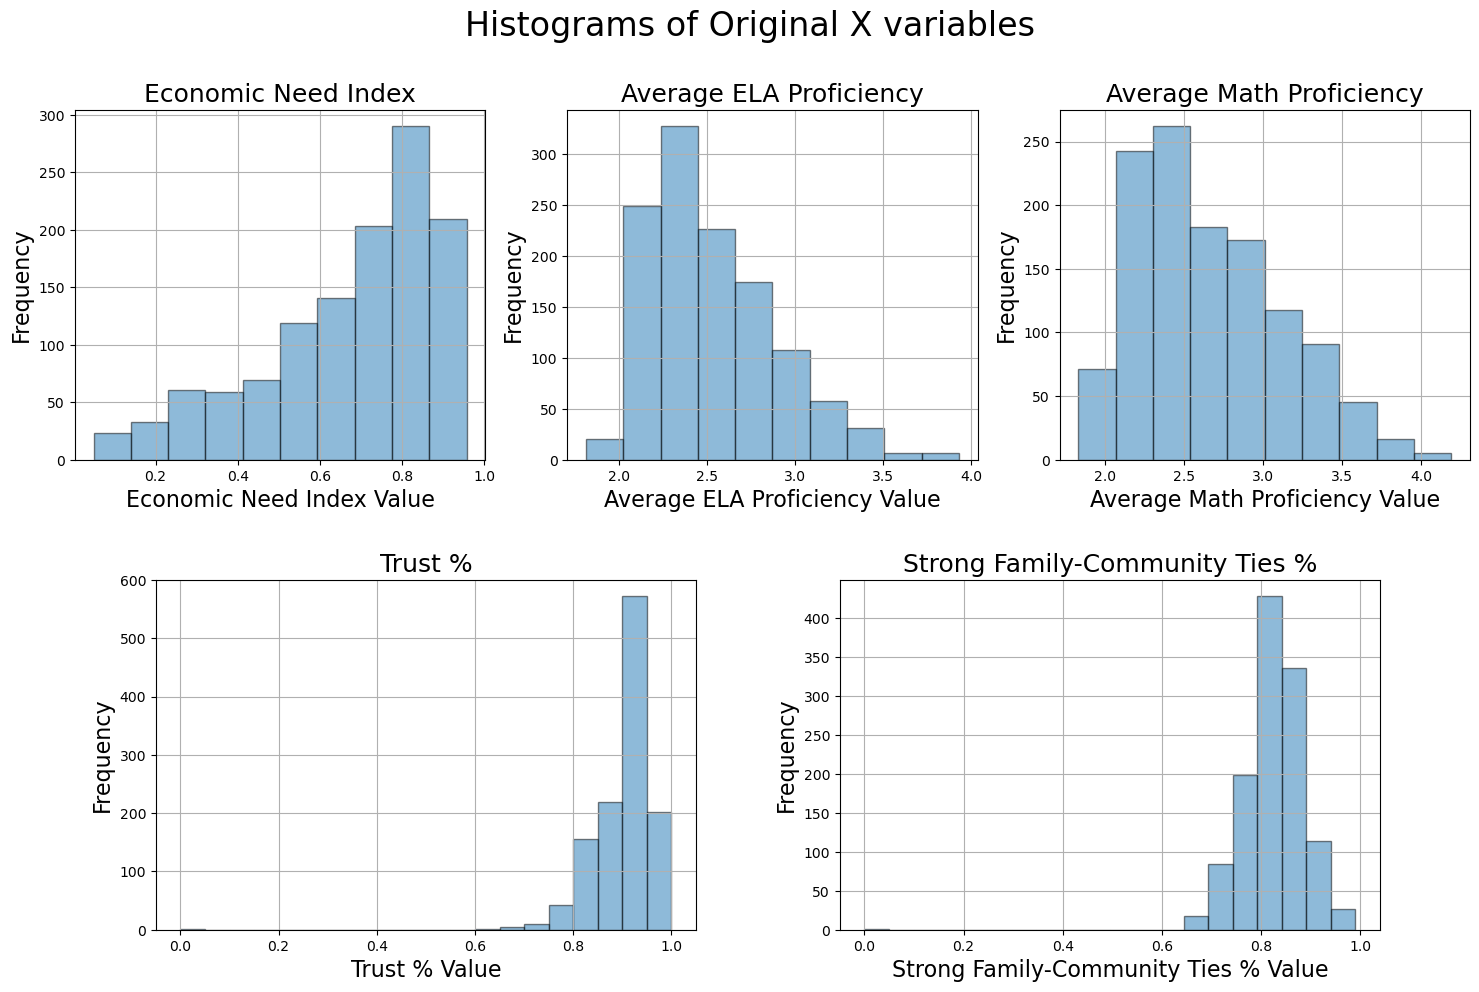

In [12]:
# Define variables
first_variables = df[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency']]
second_variables = df[['Trust %', 'Strong Family-Community Ties %']]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) 
fig.suptitle('Histograms of Original X variables', fontsize = 24)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for first set of variables
for i, (column, variable) in enumerate(first_variables.items()):
    variable.hist(bins=10, alpha=0.5, ax=axes[i], edgecolor='black')
    axes[i].set_title(column, fontsize = 18)
    axes[i].set_xlabel(f'{column} Value', fontsize = 16)  
    axes[i].set_ylabel('Frequency', fontsize = 16)

# Plot histograms for second set of variables
for i, (column, variable) in enumerate(second_variables.items(), start=len(first_variables.columns)):
    variable.hist(bins=20, alpha=0.5, ax=axes[i], edgecolor='black')
    axes[i].set_title(column, fontsize = 18)
    axes[i].set_xlabel(f'{column} Value', fontsize = 16)  
    axes[i].set_ylabel('Frequency', fontsize = 16)

# Remove empty subplot
fig.delaxes(axes[5])

# Adjust the positions of the subplots manually
axes[3].set_position([0.17, 0.06, 0.3, 0.35]) 
axes[4].set_position([0.55, 0.06, 0.3, 0.35])  

#plt.subplots_adjust(hspace=0.4)
plt.show()

The economic need index shows a left skewed distribution. This indicates that a high number of New York City public schools serve students with high amounts of economic need. This is possibly due to higher rates of poverty in New York City compared to the United States national average. In contrast, that same trend could be reflective of wealthier families deciding to send their children to private schools rather than public. Both test score histograms indicate that many schools tend to have non-proficient exam scores on average. 

Both graphs on the bottom show a heavy left skew. This means that the data shows high trust and community ties in most New York City public schools on average. However, this could possibly be due to the fact that this data was compiled through a survey by the school system, which could mean the respondees are people who are more involved with the school system than the average person.

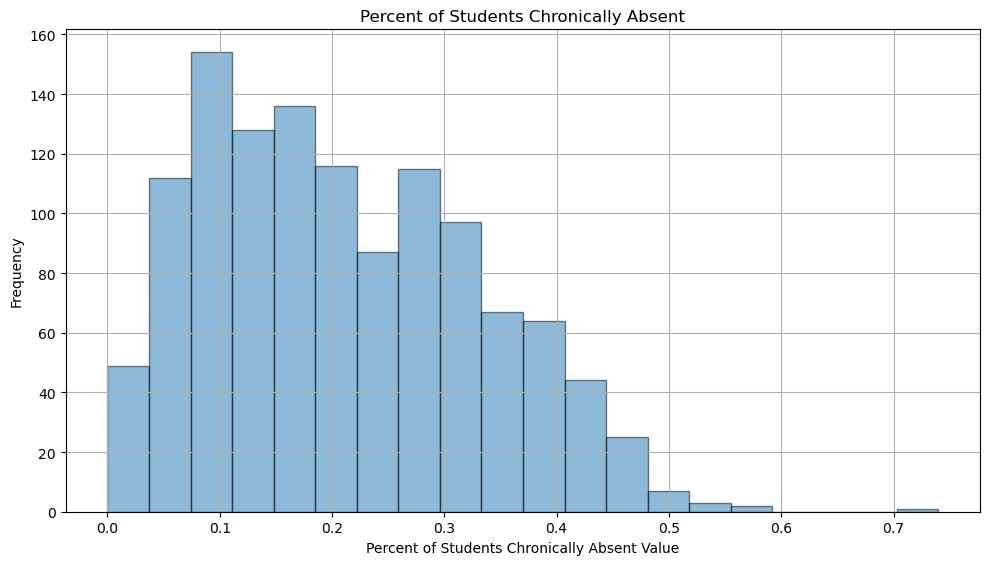

In [13]:
third_variable = df[['Percent of Students Chronically Absent']]

third_variable = df[['Percent of Students Chronically Absent']]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
#fig.suptitle('Histogram of X Variable')

# Plot histogram
third_variable.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
ax.set_title(third_variable.columns[0])
ax.set_xlabel(f'{third_variable.columns[0]} Value')  
ax.set_ylabel('Frequency')

# Adjust the layout 
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

The percent of students chronically absent shows a right skew, meaning that most schools have a mean greater than the median. This means that New York City public schools have a lower rate of chronic absenteeism than what is indicated by the mean. The outlier school who reports a chronic absenteeism rate of over seventy percent is called New Directions Secondary School. It is a transfer high school intended for students who have fallen behind on credits (New Directions Secondary School - District 9, n.d.). This might be an example of the positive relationship between academic success and chronic absenteeism, as falling behind on credits means that a student did not pass courses in at least one point of their academic career. Another point of interest is that students have an economic need index of 0.92 in this school. This could point to a positive relationship between the economic need of students and their chronic absenteeism as well. 

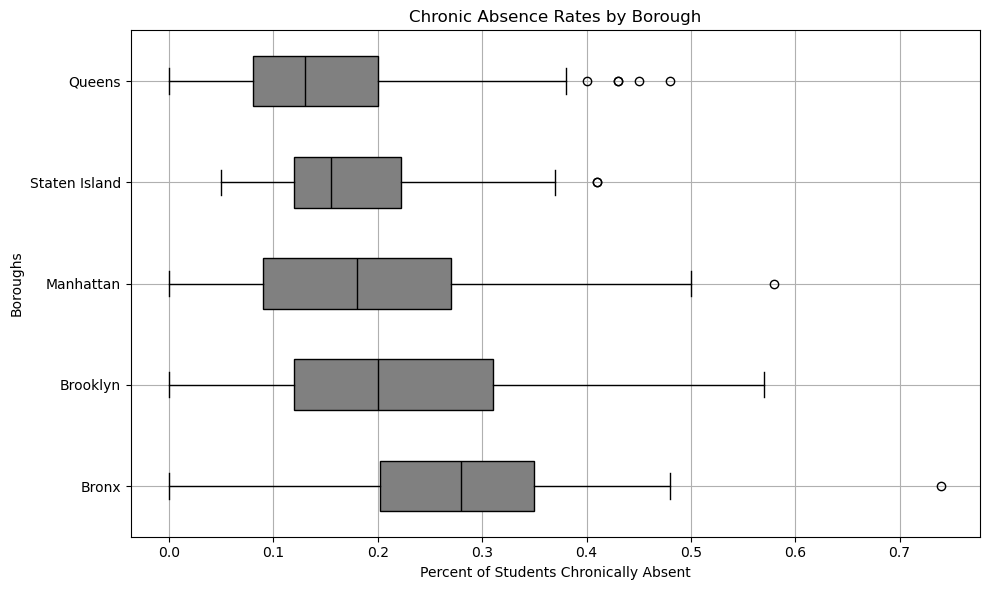

In [14]:
#create bar plot to show chronic absence rates for each NYC borough
applicable_columns_table = df

def get_borough(zip_code):
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# Define the order of boroughs
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens']

# get new borough column 
applicable_columns_table['Borough'] = applicable_columns_table['Zip'].apply(get_borough)

# Filter out Unknown borough
applicable_columns_table = applicable_columns_table[applicable_columns_table['Borough'] != 'Unknown']

# group by borough and get average chronic absence rates
grouped_data = applicable_columns_table.groupby('Borough')['Percent of Students Chronically Absent'].mean().reset_index()

# Create a new column in grouped_data
grouped_data['Borough_Order'] = grouped_data['Borough'].apply(lambda x: borough_order.index(x))

# Sort the data by Borough_Order
grouped_data_sorted = grouped_data.sort_values(by='Borough_Order')

# Create a horizontal box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot([applicable_columns_table[applicable_columns_table['Borough'] == borough]['Percent of Students Chronically Absent'] for borough in grouped_data_sorted['Borough']], 
                  vert=False, 
                  patch_artist=True,
                  medianprops=dict(color='black'))

# Set the facecolor of the boxes
for patch in box['boxes']:
    patch.set(facecolor='gray')

plt.xlabel('Percent of Students Chronically Absent')
plt.ylabel('Boroughs')
plt.title('Chronic Absence Rates by Borough')
plt.yticks(range(1, len(grouped_data_sorted['Borough']) + 1), grouped_data_sorted['Borough'])
plt.grid(True)
plt.tight_layout()

plt.show()

This box plot shows percentiles of the rates of chronically absent students across schools in each New York City borough. The Bronx has the highest average rates of chronic absenteeism in the city, which could possibly be due to the fact that it has the highest percentage of its population living under the poverty line. The data previously indicated higher rates of chronically absent students in schools that have students with greater economic need, meaning this result makes sense in relation to economic data. The positive relationship between economic need and student absenteeism supports Queens having the lowest average chronic absentee percentage. This is because Queens' schools have the lowest level of economic need throughout the city. The trend seen here could also be due to such factors as public transportation availability in each borough and how many families send their children to public versus private schools. Interestingly, Brooklyn has the highest maximum absentee rate. This is interesting because the school has over fifty percent of students chronically absent and it is not classified as an outlier. This could be due to the way matplotlib classifies outliers in their plots or mean that there are a couple schools in Brooklyn with much higher chronic absence rates than the rest of the borough. This could be caused by certain schools being in areas that are not easily accessible by public transportation. 

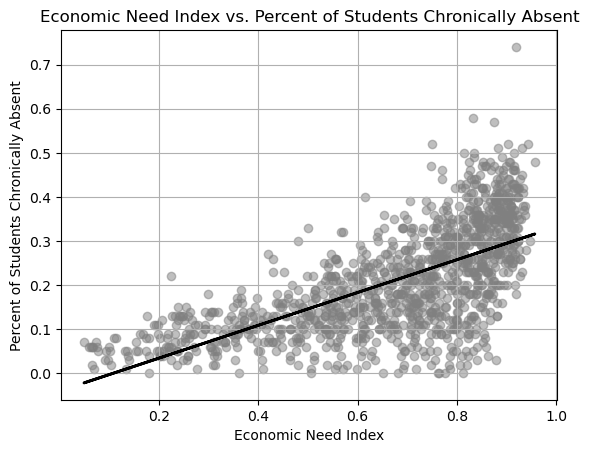

In [15]:
useful_variables = ['Economic Need Index', 'Percent of Students Chronically Absent']

# get values
economic_need_index_values = df[useful_variables[0]]
absent_percentage_values = df[useful_variables[1]]
slope, intercept = np.polyfit(economic_need_index_values, absent_percentage_values, 1)
line_of_best_fit = slope * economic_need_index_values + intercept

#plot
plt.scatter(economic_need_index_values, absent_percentage_values, c='gray', alpha=0.5)
plt.plot(economic_need_index_values, line_of_best_fit, color='black', linewidth=2)

# Add title and labels
plt.title('Economic Need Index vs. Percent of Students Chronically Absent')
plt.xlabel('Economic Need Index')
plt.ylabel('Percent of Students Chronically Absent')

plt.grid(True)
plt.show()

This scatterplot shows the relationship between the average economic need index and percent of students chronically absent from schools in New York City. It shows a positive relationship between the two, meaning schools with students that require higher amounts of economic need experience higher rates of chronic absenteeism. This could possibly be due to the fact that parents of these children are forced to work, leaving them responsible to take care of younger siblings. The strongest positive relationship is shown at very high economic need. This could be reflective of students who do not have access to necessities such as food, shelter, transportation, and healthcare. If a student does not have these basic needs met, they would take first priority and prevent a student from consistently coming to school. Particularly, if a student does not have adequate healthcare, recovery from illness and injury may take much longer than with quality healthcare, which could negatively impact the students' ability to attend school. 

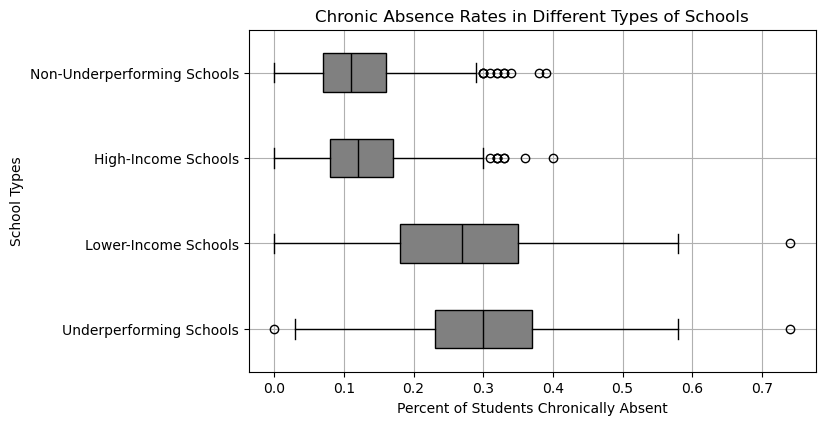

In [15]:
# Create table for chronic absence rate summary statistics for lower income schools
lower_income_schools = relevant_columns_table[relevant_columns_table['Economic Need Index'] > relevant_columns_table['Economic Need Index'].mean()]
chronic_absence_lower_income = lower_income_schools['Percent of Students Chronically Absent'].describe().round(2)
table_lower_income = chronic_absence_lower_income.to_frame().T

# Create table for chronic absence rate summary statistics for high income schools
high_income_schools = relevant_columns_table[relevant_columns_table['Economic Need Index'] < relevant_columns_table['Economic Need Index'].mean()]
chronic_absence_high_income = high_income_schools['Percent of Students Chronically Absent'].describe().round(2)
table_high_income = chronic_absence_high_income.to_frame().T

# Create table for summary statistics for schools with below average math and ELA scores
schools_under_proficiency = relevant_columns_table[(relevant_columns_table['Average ELA Proficiency'] <= 2.45) & (relevant_columns_table['Average Math Proficiency'] <= 2.57)]
chronic_absence_under_prof = schools_under_proficiency['Percent of Students Chronically Absent'].describe().round(2)
table_under_proficiency = chronic_absence_under_prof.to_frame().T

#create table for summary statistics for schools with above average math and ELA scores
schools_over_proficiency = relevant_columns_table[(relevant_columns_table['Average ELA Proficiency'] > 2.45) & (relevant_columns_table['Average Math Proficiency'] > 2.57)]
chronic_absence_over_prof = schools_over_proficiency['Percent of Students Chronically Absent'].describe().round(2)
table_over_proficiency = chronic_absence_over_prof.to_frame().T

# Put into dataframe
data = {
    'Underperforming Schools': schools_under_proficiency['Percent of Students Chronically Absent'],
    'Lower-Income Schools': lower_income_schools['Percent of Students Chronically Absent'],
    'High-Income Schools': high_income_schools['Percent of Students Chronically Absent'],
    'Non-Underperforming Schools': schools_over_proficiency['Percent of Students Chronically Absent']
}

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data.values(), labels=data.keys(), vert=False, patch_artist=True, boxprops=dict(facecolor='gray'), medianprops=dict(color='black'))
plt.title("Chronic Absence Rates in Different Types of Schools")
plt.xlabel("Percent of Students Chronically Absent")
plt.ylabel("School Types")
plt.grid(True)
plt.tight_layout(pad=7.0)
plt.show()

In this boxplot, underperforming schools are the schools that report math and ELA test scores under the median for the city with non-underperforming schools reporting scores above the median. Likewise, low-income schools are the schools that report an economic need index under the median for the city with high-income schools reporting economic need indices above the median. This data suggests that students with greater economic need have a higher rate of chronic absenteeism. The mean indicates that on average, schools with economic need index higher than the average in New York City have an average chronic absenteeism percentage almost twenty percentage points higher than the City's higher income schools. This could be caused by numerous factors including the need to work instead of attending school and a parent's need to work and leave an older child to care for a younger one. Additionally, the data reflects that chronic absenteeism is more common in schools with students who score, on average, lower than other New York City public schools in both math and ELA examinations. The data reflects that non-underperforming schools have an average chronic absentee percentage almost twenty percentage points lower than underperforming schools. This could possibly be due to students not being in school enough to learn the necessary material for the assessments. However, this could also show how low assessment scores give students little motivation to attend school.

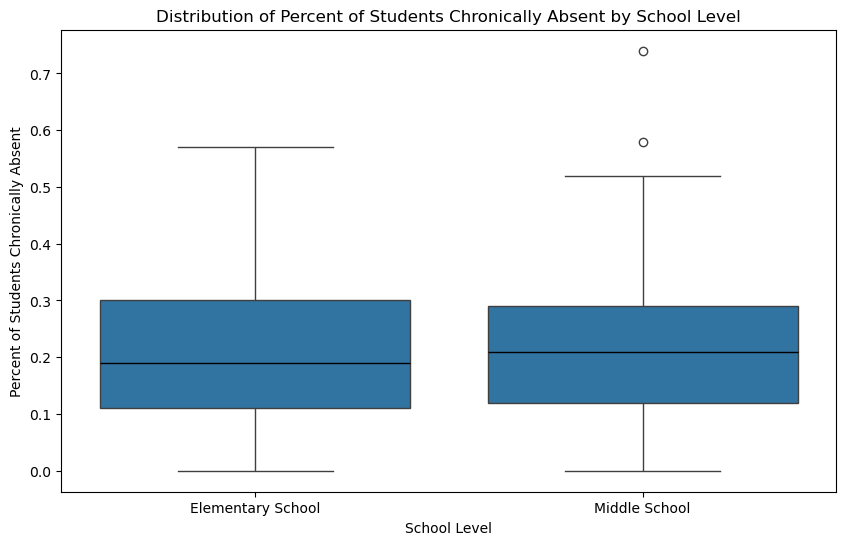

In [16]:
#create bar graph for chronic absenteeism for schools 5-8 and schools K-5
pertinent_variables = df['Grades']

def map_school_level(grades):
    if any(grade in grades for grade in ['PK', '0K', '01', '02']):
        return 'Elementary School'
    elif any(grade in grades for grade in ['06', '07', '08']):
        return 'Middle School'
    else:
        return 'Unknown'

# Apply the mapping function to create a new column
df['School_Level'] = df['Grades'].apply(map_school_level)

# Filter unknown category
df = df[df['School_Level'] != 'Unknown']

# Order the school levels
school_order = ['Elementary School', 'Middle School']

#create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Level', y='Percent of Students Chronically Absent', data=df,
            order=school_order, medianprops = dict(color='black'))
plt.title('Distribution of Percent of Students Chronically Absent by School Level')
plt.xlabel('School Level')
plt.ylabel('Percent of Students Chronically Absent')
plt.show()

This box plot shows the percent of students chronically absent by different levels of school. It displays how younger students who are in elementary school tend to have similar rates of chronic absenteeism as those in middle school. The difference is small enough that it is probably not statistically significant. However, the fact that the different levels of school show similar average chronic absence rates is something to note. It suggests that being able to walk to school without a parent in middle school is not a factor in chronic absenteeism, meaning that transportation might not be a very important factor in chronic absenteeism.

It should be noted that this graph does not include any schools that are not grade level pre-K to 2, 3-5, or 6-8. The reasoning for not including schools that do not fit this mold is that individual grade level data was not available in this dataset. This makes the similarities observed in the box plot less valid for schools that do not serve the traditional grade structures outlined before. Although including the high school level would have provided greater insight, most public high schools in New York City also educate the middle schools grades as well, making it impossible to decipher between the two levels.

# Project Two

## The Message

The impact of economic need on chronic absenteeism is stronger in schools that experience high amounts of transportation delays compared to those with fewer delays.

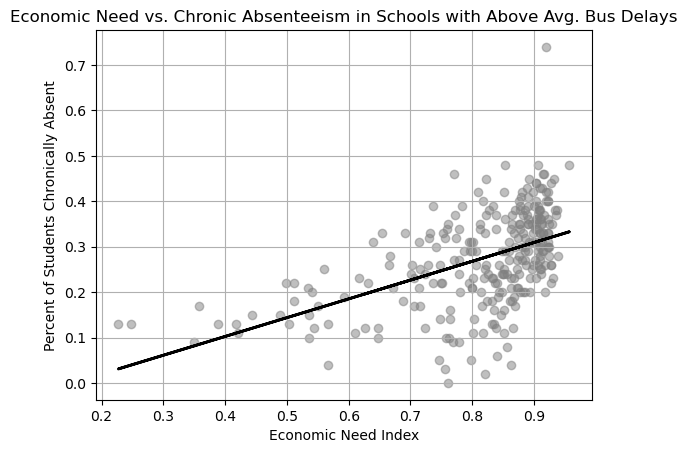

In [39]:
bus_delays = pd.read_csv('Bus_Breakdown_and_Delays_20240327.csv', dtype={'Informed_On': str}, low_memory=False)
bus_delays = bus_delays[bus_delays['Boro'].isin(['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island'])]
bus_delays = bus_delays[bus_delays['Number_Of_Students_On_The_Bus'] != 0]

# Define a function to extract numbers from a string using regex
def extract_numbers(text):
    numbers = re.findall(r'\d+', str(text))
    return int(numbers[0]) if numbers else 0

# Apply the function to the "How_Long_Delayed" column to keep only the numbers
bus_delays['How_Long_Delayed'] = bus_delays['How_Long_Delayed'].apply(extract_numbers)
bus_delays = bus_delays[bus_delays['How_Long_Delayed'] != 0]

borough_delays = bus_delays.groupby('Boro').size().reset_index(name='Delays')

# Rename the columns for clarity
borough_delays.columns = ['Borough', 'Delays']

# Sort the DataFrame by the number of delays in descending order
borough_delays = borough_delays.sort_values(by='Delays', ascending=False)

# Reset the index of the DataFrame
borough_delays.reset_index(drop=True, inplace=True)

# Define the function to map zip codes to boroughs
def get_borough(zip_code):
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# Apply the function to create a new column 'Borough' in nyc_pop_df
nyc_pop_df['Borough'] = nyc_pop_df['Zip'].apply(get_borough)

# Group by 'Borough' and sum the 'Population' column
nyc_boro_pop = nyc_pop_df.groupby('Borough')['Population'].sum().reset_index()

# Rename the columns for clarity
nyc_boro_pop.columns = ['Borough', 'Population']

# Display the new DataFrame
nyc_boro_pop_delay = pd.merge(borough_delays, nyc_boro_pop, on='Borough')

# Rename columns in 'grouped_data_sorted' DataFrame to avoid duplicates
grouped_data_sorted.rename(columns={
    'Borough_Order': 'Borough_Order_grouped',
    'Percent of Students Chronically Absent': 'Percent of Students Chronically Absent_grouped'
}, inplace=True)

# Merge 'nyc_boro_pop_delay' with 'grouped_data_sorted' on the 'Borough' column
nyc_boro_pop_delay = pd.merge(nyc_boro_pop_delay, grouped_data_sorted, on='Borough')

nyc_boro_pop_delay['Delays per Capita'] = nyc_boro_pop_delay['Delays'] / nyc_boro_pop_delay['Population']

# Define the function to get the borough from zip code
def get_borough(zip_code):
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'
    
# Add a new column 'Borough' based on the 'Zip' column
df.loc[:, 'Borough'] = df['Zip'].apply(get_borough)

nyc_boro_pop_delay = pd.merge(nyc_boro_pop_delay, df, on='Borough')

# Filter data for areas with above-average bus delays
above_avg_bus_delays = df_cleaned[df_cleaned['Bus Delays Above Average'] == 1]

# Define variables
economic_need_index_values = above_avg_bus_delays['Economic Need Index']
absent_percentage_values = above_avg_bus_delays['Percent of Students Chronically Absent']

# Calculate line of best fit
slope, intercept = np.polyfit(economic_need_index_values, absent_percentage_values, 1)
line_of_best_fit = slope * economic_need_index_values + intercept

# Plot scatterplot
plt.scatter(economic_need_index_values, absent_percentage_values, c='gray', alpha=0.5)
plt.plot(economic_need_index_values, line_of_best_fit, color='black', linewidth=2)

# Add title and labels
plt.title('Economic Need vs. Chronic Absenteeism in Schools with Above Avg. Bus Delays')
plt.xlabel('Economic Need Index')
plt.ylabel('Percent of Students Chronically Absent')

plt.grid(True)
plt.show()

This scatterplot shows the economic need index in schools with above average school bus delays and its relationship with chronic absenteeism. As seen above, there is a significant positive relationship between economic need and chronic absenteeism in schools with above average school bus delays per capita. This means that higher amounts of economic need in these schools is correlated with increased chronic absenteeism. It should be noted that much of the data is clustered at high levels of economic need and chronic absenteeism, suggesting that this relationship is even stronger in schools with students who have high economic need. This could be because the parents of students who have high economic need are forced to work long hours to make ends meet, taking away from the time they would be using to ensure their children attend school. 

## Merging Data

Another socio-economic factor that could be impactful in chronic absenteeism is the crime rate. Crime is generally related to economic need (Imran, Hosen, & Chowdry, 2018), meaning the need to isolate these factors and how they relate to chronic absenteeism is important for regression analysis. For this reason New York City violent and non-violent crime data was merged in this project to determine if there is a relationship between it and chronic absenteeism. The data was obtained from the New York Police Department historical crime data for the year 2016, the same year as the public school data. 

## Maps and Interpretations

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


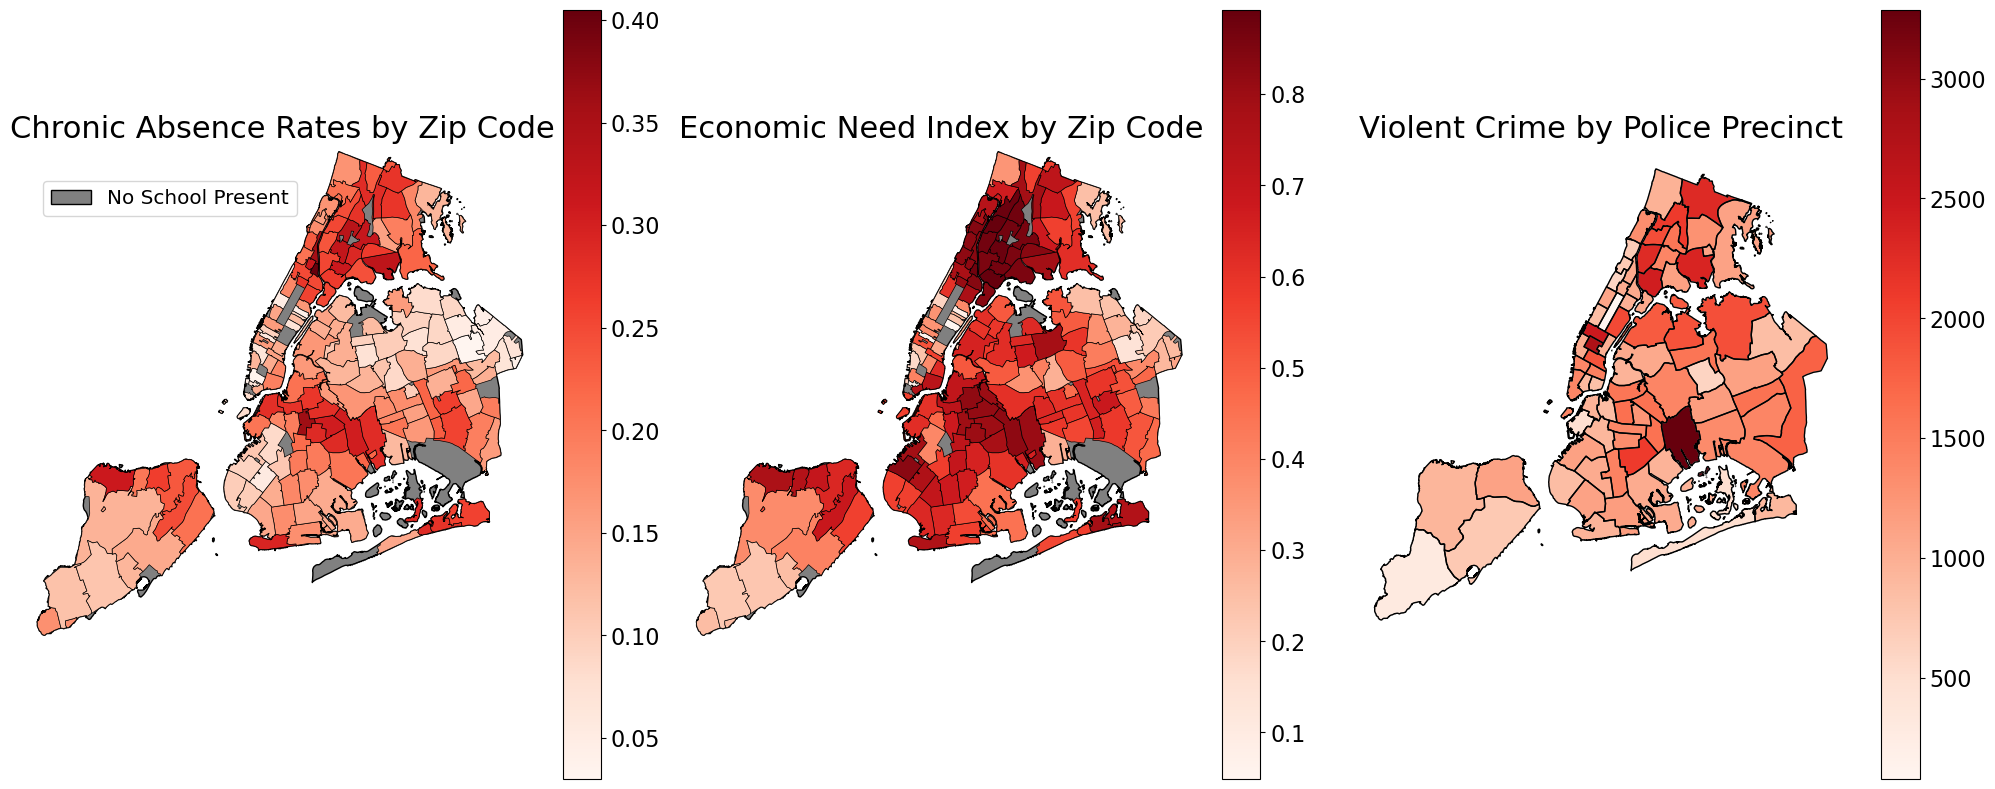

In [18]:
#shape files
nyc_boroughs_url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile"
nyc_boroughs = gpd.read_file(nyc_boroughs_url)
ny_boroughs = nyc_boroughs.rename(columns={'boro_name': 'BoroName'})

#Zip Code shape files
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")
zip_df = zip_df.to_crs(nyc_boroughs.crs)

nyc_police_precincts_data = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=GeoJSON'
police_precincts = gpd.read_file(nyc_police_precincts_data)

merged_data = police_precincts.merge(df_crime, left_on='precinct', right_on='PCT', how='left')

# Add the 2016 column 
merged_data['2016'] = df_crime['2016']

# Filter for NYC zips only
nyc_zip_codes = gpd.overlay(zip_df, nyc_boroughs, how='intersection')

# Group by zip code & calc average percent chronically absent
zip_code_group_absentee = df.groupby("Zip")["Percent of Students Chronically Absent"].mean().reset_index()

# Convert  to str
zip_code_group_absentee['Zip'] = zip_code_group_absentee['Zip'].astype(str)

# Merge dataframes
nyc_zip_codes_absentee = pd.merge(nyc_zip_codes, zip_code_group_absentee, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Group by zip code - calc avg econ need
zip_code_group_economic = df.groupby("Zip")["Economic Need Index"].mean().reset_index()

# Convert to str
zip_code_group_economic['Zip'] = zip_code_group_economic['Zip'].astype(str)

# Merge dataframes 
nyc_zip_codes_economic = pd.merge(nyc_zip_codes, zip_code_group_economic, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Create a figure
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 8))

# Plot chronic absence
nyc_boroughs.plot(ax=ax0, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_absentee.plot(ax=ax0, column='Percent of Students Chronically Absent', legend=False, cmap='Reds', edgecolor='black', linewidth=0.5)
ax0.set_xlim([-74.26, -73.69])
ax0.set_ylim([40.49, 40.92])
ax0.set_title("Chronic Absence Rates by Zip Code", fontsize=22)
ax0.axis("off")

# Create color bar for ax0
sm0 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_absentee['Percent of Students Chronically Absent'].min(), vmax=nyc_zip_codes_absentee['Percent of Students Chronically Absent'].max()))
cbar0 = fig.colorbar(sm0, ax=ax0)
cbar0.ax.tick_params(labelsize=16)

# Create legend for first map
legend_elements_absentee = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax0.legend(handles=legend_elements_absentee, loc='upper left', bbox_to_anchor=(0.0, 0.95), fontsize='x-large')

# Plot Economic Need Index 
nyc_boroughs.plot(ax=ax1, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_economic.plot(ax=ax1, column='Economic Need Index', legend=False, cmap='Reds', edgecolor='black', linewidth=0.5)
ax1.set_xlim([-74.26, -73.69])
ax1.set_ylim([40.49, 40.92])
ax1.set_title("Economic Need Index by Zip Code", fontsize=22)
ax1.axis("off")

# Create color bar for ax1
sm1 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_economic['Economic Need Index'].min(), vmax=nyc_zip_codes_economic['Economic Need Index'].max()))
cbar1 = fig.colorbar(sm1, ax=ax1)
cbar1.ax.tick_params(labelsize=16)

# Plot the third map
merged_data.plot(column='2016', cmap='Reds', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=False)
police_precincts.plot(ax=ax2, color='none', edgecolor='black')
ax2.set_title('Violent Crime by Police Precinct', fontsize=22)
ax2.set_axis_off()

# Create color bar for ax2
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=merged_data['2016'].min(), vmax=merged_data['2016'].max()))
cbar2 = fig.colorbar(sm2, ax=ax2)
cbar2.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

These maps show the chronic absence rates and economic need index for zip codes across New York City as well violent crime by NYC Police Precinct. Violent crime is not in per capita terms due to the fact that data on population size for each police precinct is not available. As seen in the maps, chronic absence and economic need show a positive relationship even for local level data. Especially strong relationships are seen in the North Brooklyn area and the Bronx. These areas show some of the highest economic need and most chronic absenteeism. This further backs up the theory of parents being forced to work more due to their economic status, which leaves less time for ensuring their children attend school. Additionally, this could be reflective of students themselves finding a need to work rather than attend school. 

There is one area in the city that does not follow this trend. South Brooklyn has relatively low chronic absenteeism but also relatively high economic need. Although anecdotal, zip code 11220 shows the most drastic negative relationship between the two variables. Digging deeper, all but one of the public schools in the zip code are elementary schools. This could reflect the fact that younger children are not able to work, meaning they are not missing class to go to work. While the chronic absence rates and economic need index are shown by zip code, the violent crime is shown by police precinct. The reason for this is that there is no zip code level data available for crime in New York City. However, the precincts still display the general crime level at a localized granularity, allowing for analysis.

There is variation in the relationship between chronic absenteeism and violent crime based on the area of the city. The Bronx displays the strongest relationship. It also shows the highest economic need index of anywhere in the city, possibly indicating that many socioeconomic issues may exist in the Bronx that contribute to chronic absenteeism as well. The areas of East Brooklyn, East Queens, and North Staten Island also show a relationship with violent crime. However, this relationship is not as strong as the one in the Bronx. These areas reflect the average amount of violent crime in the city, making it hard to observe a strong relationship. The fact that the relationship is not as strong could be indicative that crime and its determinants are not one of the main factors in chronic absenteeism, rather other socio-economic determinants. This could be because crime is being performed by adults who have long ago graduated school, not affecting children. A possibility for further inquiry would be to analyze chronic absenteeism in high schools (which is not possible with this data set because most high schools in the dataset also serve elementary and middle school students) as age fourteen is the median age males join gangs (Pyrooz & Sweeten, 2015).

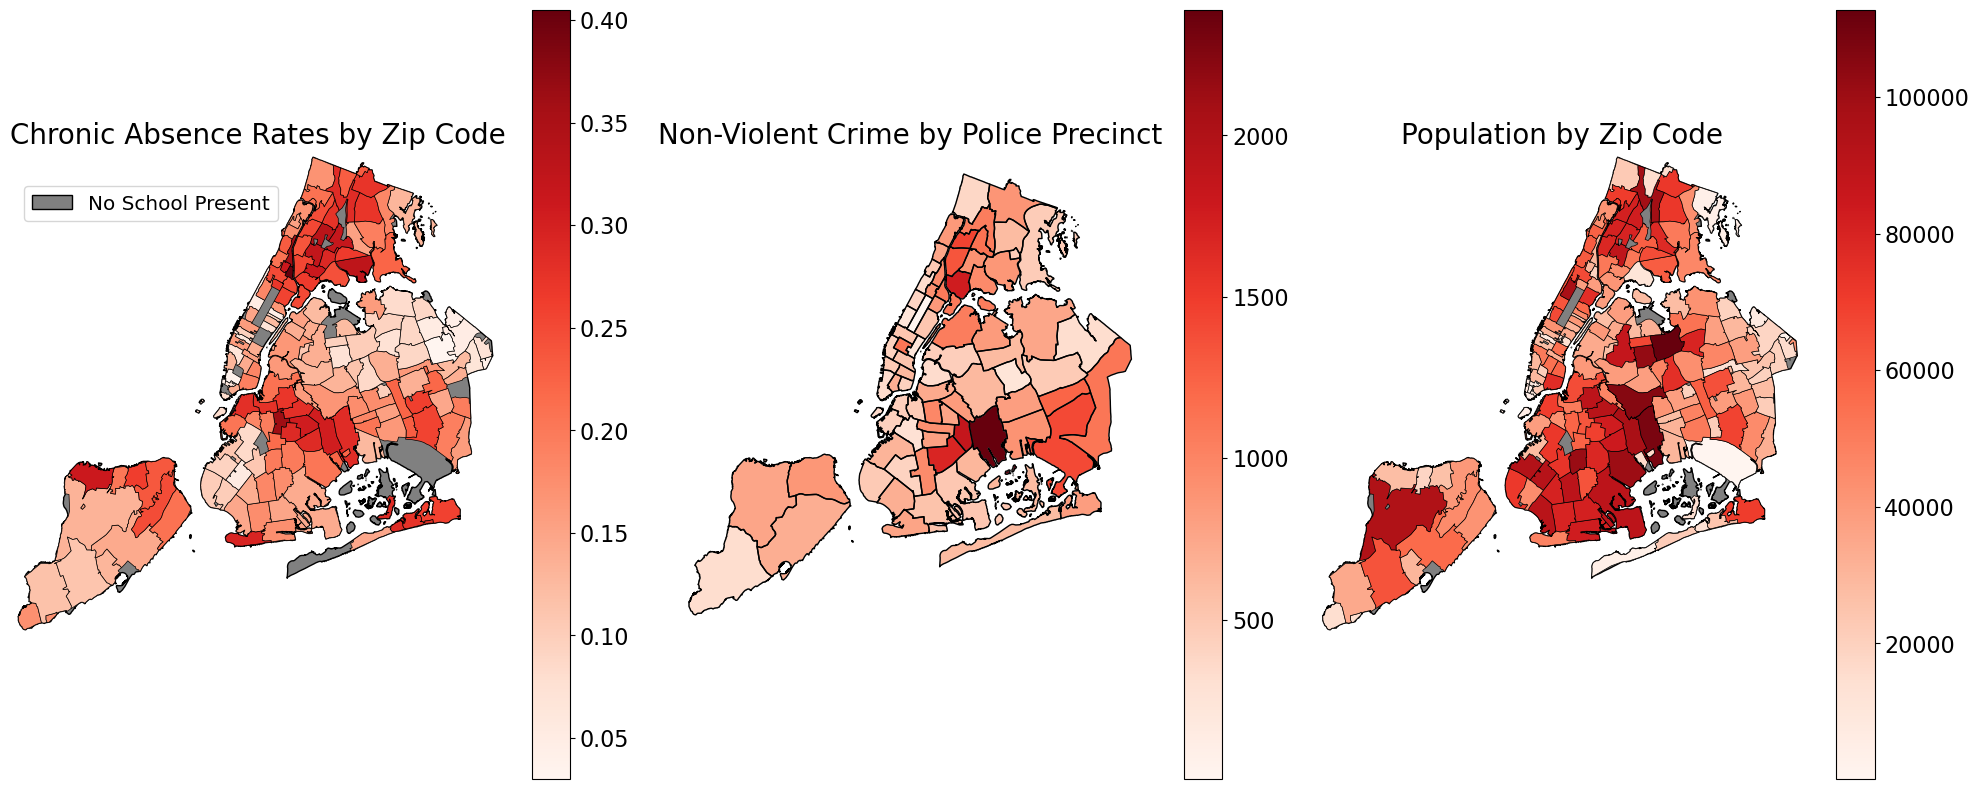

In [19]:
# Load data
nyc_police_precincts_data = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=GeoJSON'
police_precincts = gpd.read_file(nyc_police_precincts_data)

merged_data_novi = police_precincts.merge(df_crime_novi, left_on='precinct', right_on='PCT', how='left')

# Add the 2016 crime 
merged_data_novi['2016'] = df_crime_novi['2016']

nyc_zip_codes['ZCTA5CE10'] = nyc_zip_codes['ZCTA5CE10'].astype('int')
nyc_zip_codes_population = pd.merge(nyc_zip_codes, nyc_pop_df, left_on='ZCTA5CE10', right_on='Zip', how='left')


# Initialize plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

zip_code_group_absentee['Zip'] = zip_code_group_absentee['Zip'].astype('int64')
nyc_zip_codes_absentee2 = pd.merge(nyc_zip_codes, zip_code_group_absentee, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Plot the first map
nyc_boroughs.plot(ax=ax1, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_absentee2.plot(ax=ax1, column='Percent of Students Chronically Absent', legend=False, cmap='Reds', edgecolor='black', linewidth=0.5)
ax1.set_xlim([-74.26, -73.69])
ax1.set_ylim([40.49, 40.92])
ax1.set_title("Chronic Absence Rates by Zip Code", fontsize = 20)
ax1.axis("off")

# Create color bar for ax1
sm1 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_absentee2['Percent of Students Chronically Absent'].min(), vmax=nyc_zip_codes_absentee2['Percent of Students Chronically Absent'].max()))
cba1 = fig.colorbar(sm1, ax=ax1)
cba1.ax.tick_params(labelsize=16)

legend_elements_absentee = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax1.legend(handles=legend_elements_absentee, loc='upper left', bbox_to_anchor=(0.0, 0.95), fontsize='x-large')

# Plot the second map
merged_data_novi.plot(column='2016', cmap='Reds', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=False)
police_precincts.plot(ax=ax2, color='none', edgecolor='black')
ax2.set_title('Non-Violent Crime by Police Precinct', fontsize = 20)
ax2.set_axis_off()

# Create color bar for ax2
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=merged_data_novi['2016'].min(), vmax=merged_data_novi['2016'].max()))
cba2 = fig.colorbar(sm2, ax=ax2)
cba2.ax.tick_params(labelsize=16)

# Plot the third map
nyc_boroughs.plot(ax=ax3, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_population.plot(ax=ax3, column='Population', cmap='Reds', legend=False, edgecolor='black', linewidth=0.5)
ax3.set_xlim([-74.26, -73.69])
ax3.set_ylim([40.49, 40.92])
ax3.set_title("Population by Zip Code", fontsize=20)
ax3.axis("off")

# Create color bar for ax3
sm3 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_population['Population'].min(), vmax=nyc_zip_codes_population['Population'].max()))
cba3 = fig.colorbar(sm3, ax=ax3)
cba3.ax.tick_params(labelsize=16)

# Display the plot
plt.tight_layout()
plt.show()

These maps show the chronic absenteeism, non-violent crime rate, and population by zip code in New York City. Similarly to the violent crime map, the non-violent crime map is shown by police district rather than zip codes. Non-violent crime is not in per capita terms due to the fact that data on population size for each police precinct is not available. As such, the population by zip code map shows where the population is highest throughout the city to show that although the population may be higher in some areas, more crime is indicative of a relatively larger amount of per capita crime. Analyzing the three maps, one can see there is less relationship between chronic absenteeism and non-violent crime than there is with violent crime. This could be because non-violent crime is related to factors such as police policies, causing people to report or get arrested for crimes at a higher or lower rate, independent of the socioeconomic factors that impact chronic absenteeism. 

One important thing to keep in mind is the fact that the data itself could be underreported. Depending on factors such as local trust in law enforcement, non-violent crime might get reported significantly less than violent crime. This would in turn skew the amounts of non-violent crime being represented in each precinct in the map. 

# Project Three

## Potential Data to Scrape

Although there is a school bus service for some New York City public school students, many students are simply given a free subway or bus ride in order to come to school (NYC Public Schools, n.d.). Without reliable transportation, students may not be able to get to school, affecting chronic absenteeism. As such, scraping public transportation delay data would be helpful to examine how public transportation reliability affects chronic absenteeism. The website to be used to scrape this data is the MTA's (the New York City public transportation agency) delay website https://new.mta.info. Scraping this data would allow for a further understanding of the amount of delays on each transportation node and the exact route that the delays occur. These routes could be merged with location data already present in the original data set to understand the reliability of transportation for students in every zip code. With this new information, the project could examine how the reliability of public transportation impacts a student's ability to come to school through various methods including regression analysis.

## Potential Challenges

In order to obtain this data many difficulties arise. First, the New York City government does offer historical delay data, but unfortunately it is by mode of transportation and does not offer the time of day or stations affected by delays. This means there is no historical record of transportation delays by exact station location, making it difficult to use the data to understand chronic absenteeism at local schools. In order to obtain data that offers the time of day the delay occurs and exact locations that are impacted, scraping the current delay data is needed. This poses its own problems as scraping the data in one period of time is not enough to see any trends. Instead, one must scrape this data for a long period of time, preferably years to see overall trends in the transportation system. Additionally, even after obtaining this data, one must overlay it to zip code by finding a dataset that includes the address of all New York City transportation stations. Further, there is the potential that the MTA may not allow web scraping of their transportation data, so getting permission from the agency could be a problem in being able to actually use the data. In order to scrape the data, I will need to understand further how the transportation delay page is updated and how to write code to consistently record the delays and where they occur over time. Unfortunately, due to the time constraints of this course, scraping this data over a year is impossible. As such, the data that is scraped is from the practice websites provided.

## Scraping Data from a Website

Instead of transportation reliability data, this project will be scraping a web table that ranks New York City zip codes by their population. This web table can be found at this link https://www.newyork-demographics.com/zip_codes_by_population. Despite the fact that the table ranks zip codes by population, this project will not be using the rankings and instead will be using the other two columns in the dataset: the zip code and population levels. This is because the rankings are not very meaningful for examining geographic trends in the data. Population level is another socioeconomic factor that could be a factor in chronic absenteeism. A higher population could affect the enrollment size of a school, influencing the student to pupil ratio and the amount of individualized attention each student receives. Although there is fairly consistent spending per student across New York City, larger schools could be able to implement programs that combat chronic absenteeism with their additional funding (New York City Federal Reserve, n.d.). With less personalized care for each student, it is possible that chronic absenteeism could be higher in schools that serve a smaller constituency. 
It is important to note that this population data is for each zip code and not each school district. This is because there is no data available on the population of each school district. This means that there will be many schools with the same population levels as there are often multiple schools in each zip code. As such, schools  located in high population zip codes could be seeing lower amounts of school enrollment. Further, this analysis could be improved by using enrollment data from each school district. Unfortunately, this data is unable to be HTML scraped and therefore population by zip code is the best way to analyze the size of the school via HTML scraping.

### Check For Response and Find Rows in Data

In [20]:
#read in url
web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# check for response and find rows in data
response = requests.get(web_url, headers=headers)
soup_object = BeautifulSoup(response.content, 'html.parser')
data_table = soup_object.find('table', {'class': 'ranklist'})
all_values = data_table.find_all('tr')

First, this code defines the url of the website to scrape, then spoofs the orgin of the request to make it look like chrome on windows is making the request. The reasoning for including this is to get around a website's possible restriction on scraping. Next, the code requests the HTML code from the website and arranges it into a readable output. Finally, the code specifies what on the webpage to scrape by stipulating the table and its rows. 

### Create and Populate the Data Frame

In [21]:
#create and populate dataframe
nyc_pop_df = pd.DataFrame(columns=['Rank', 'Zip', 'Population'])
for row in all_values[1:]:
    values = row.find_all('td')
    if len(values) >= 3:  # Ensure at least 3 columns are present
        Rank = values[0].text.strip()
        Zip = values[1].text.strip()
        Population = values[2].text.strip()
        nyc_pop_df = pd.concat([nyc_pop_df, pd.DataFrame({'Rank': [Rank], 'Zip': [Zip], 'Population': [Population]})], ignore_index=True)

This code now takes the data from the table on the webpage that was specified before and populates it in a pandas dataframe. Along the way it cleans the data to ensure there is no whitespace.

### Clean New HTML Scraped Data

In [22]:
#make sure there are no commas in data
nyc_pop_df['Population'] = nyc_pop_df['Population'].replace(',', '', regex=True)

#make sure theres no whitespace
nyc_pop_df['Zip'] = nyc_pop_df['Zip'].str.strip()
nyc_pop_df['Population'] = nyc_pop_df['Population'].str.strip()

#change to type float for both columns
nyc_pop_df['Zip'] = nyc_pop_df['Zip'].astype(int)
nyc_pop_df['Population'] = nyc_pop_df['Population'].astype(int)
nyc_pop_df = nyc_pop_df.drop(columns=['Rank'])

# zip code ranges
manhattan_zip_range = range(10001, 10283)  
staten_island_zip_range = range(10301, 10315) 
bronx_zip_range = range(10451, 10476) 
queens_zip_range = list(range(11004, 11110)) + list(range(11351, 11698)) 
brooklyn_zip_range = range(11201, 11257)

# Filter for only NYC
nyc_pop_df = nyc_pop_df[
    (nyc_pop_df['Zip'].isin(manhattan_zip_range)) |
    (nyc_pop_df['Zip'].isin(staten_island_zip_range)) |
    (nyc_pop_df['Zip'].isin(bronx_zip_range)) |
    (nyc_pop_df['Zip'].isin(queens_zip_range)) |
    (nyc_pop_df['Zip'].isin(brooklyn_zip_range))
]

Lastly, the data is cleaned in order to make it into a usable dataframe to create visuals. 

## Visualizing the Scraped Dataset

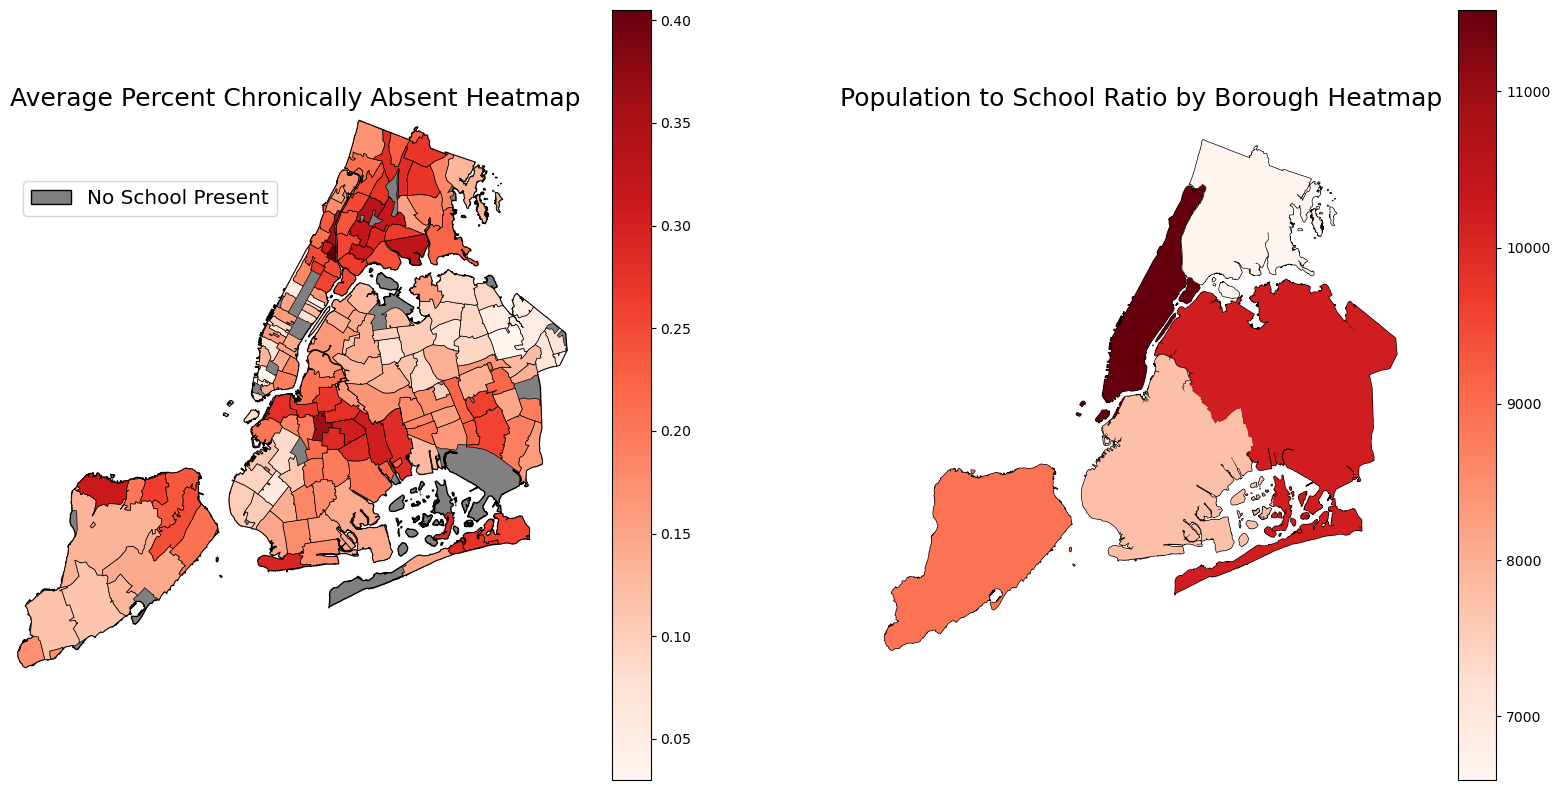

In [23]:
# Calculate number of schools in each zip code
school_counts = df['Zip'].value_counts().reset_index()
school_counts.columns = ['Zip', 'School Count']

# Convert to str
school_counts['Zip'] = school_counts['Zip'].astype(str)
nyc_pop_df['Zip'] = nyc_pop_df['Zip'].astype(str)

# Merge on zip column 
merged_df = pd.merge(school_counts, nyc_pop_df, on='Zip', how='left')

# Calculate pop-school-ratio
merged_df['pop_school_ratio'] = merged_df['Population'] / merged_df['School Count']

# Create a new DataFrame 
pop_school_df = merged_df[['Zip', 'pop_school_ratio']].copy()

# Merge nyc_pop_df with zip code shapefile
nyc_zip_codes['ZCTA5CE10'] = nyc_zip_codes['ZCTA5CE10'].astype(str)
nyc_zip_codes_population = pd.merge(nyc_zip_codes, pop_school_df, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Calculate Borough from Zip Code
def get_borough(zip_code):
    if pd.isnull(zip_code):
        return 'Unknown'
    zip_code = int(zip_code)
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

nyc_zip_codes_population['Borough'] = nyc_zip_codes_population['Zip'].apply(get_borough)

# Calculate population to school ratio by borough
borough_pop_school_df = nyc_zip_codes_population.groupby('Borough')['pop_school_ratio'].mean().reset_index()


borough_pop_school_df_filtered = borough_pop_school_df.dropna(subset=['pop_school_ratio'])
borough_pop_school_df_filtered = borough_pop_school_df_filtered[borough_pop_school_df_filtered['Borough'] != 'Unknown']
borough_pop_school_df.drop(borough_pop_school_df.tail(1).index, inplace=True)

nyc_boroughs1 = nyc_boroughs.rename(columns={'boro_name': 'Borough'})
nyc_final_map = pd.merge(nyc_boroughs1, borough_pop_school_df, on='Borough')

# Plot the absenteeism map
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

nyc_boroughs.plot(ax=ax1, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_absentee2.plot(ax=ax1, column='Percent of Students Chronically Absent', legend=True, cmap='Reds', linewidth=0.5, edgecolor='black')
ax1.set_xlim([-74.26, -73.69])
ax1.set_ylim([40.49, 40.92])
ax1.set_title("Average Percent Chronically Absent Heatmap", fontsize=18)
ax1.axis("off")

# Add legend for absenteeism map
legend_elements_absentee1 = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax1.legend(handles=legend_elements_absentee1, loc='upper left', bbox_to_anchor=(0.0, 0.9), fontsize='x-large')

# Plot the population to school ratio by borough map
nyc_boroughs.plot(ax=ax2, facecolor='gray', linewidth=1, edgecolor='black')
nyc_final_map.plot(ax=ax2, column='pop_school_ratio', cmap='Reds', linewidth=0.5, legend=True)
ax2.set_title('Population to School Ratio by Borough Heatmap', fontsize=18)
ax2.set_axis_off()

# Display plot
plt.show()

These two maps show the chronic absenteeism and population to school ratio for New York City. The population to school ratio is a variable made by dividing the population in each zip code by the amount of schools in each zip code. This yields the average number of people each school in a zip code serves. However, the population to school ratio is displayed by borough instead of zip code, as many students are able to attend schools outside of their zip code. As seen in the maps, there is a negative relationship between population to school ratio and chronic absenteeism. This could imply that the funding a school gets, although fairly consistent across the city per pupil size (New York City Federal Reserve, n.d.), is utilized to combat chronic absenteeism to a greater extent in larger schools. Such programs larger schools might be able to implement that smaller schools would find more difficult to put into effect could be an increased level of mental and physical healthcare available through the school. 

One thing to keep in mind is that the population to school ratio map shows the school density by borough. In reality, schools draw from districts that are not necessarily related to which borough a student lives. Potential improvements to this map would show school density by using enrollment by school district data. This would allow for a more accurate representation of the average enrollment for each school, which could allow for more precise measurements and relationships to be observed.

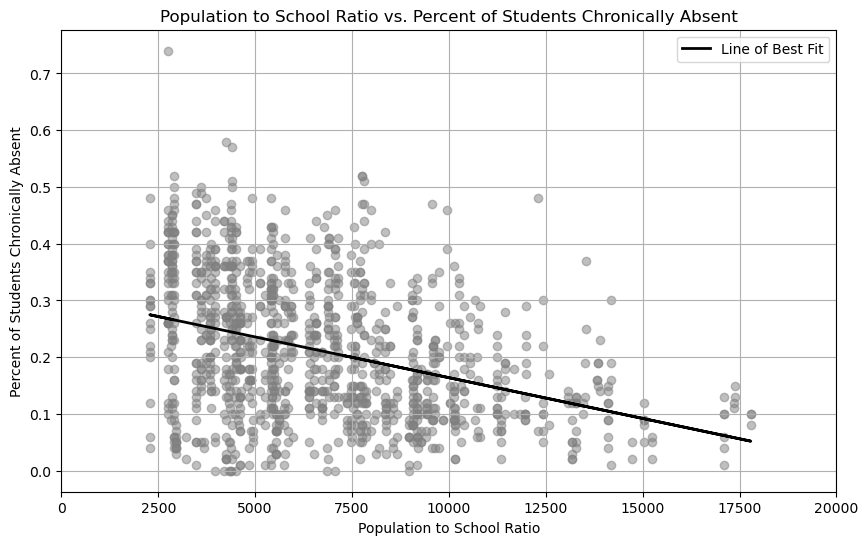

In [24]:
# Convert to str using .loc method
pop_school_df.loc[:, 'Zip'] = pop_school_df['Zip'].astype(str)
df.loc[:, 'Zip'] = df['Zip'].astype(str)

# Merge dataframes
mergy = pd.merge(pop_school_df, df, on='Zip', how='inner')

# Filter data points
mergy_filtered = mergy[mergy['pop_school_ratio'] <= 20000]

# Line of best fit
x_values = mergy_filtered['pop_school_ratio']
y_values = mergy_filtered['Percent of Students Chronically Absent']
coefficients = np.polyfit(x_values, y_values, 1)
line = np.polyval(coefficients, x_values)

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(mergy_filtered['pop_school_ratio'], mergy_filtered['Percent of Students Chronically Absent'], color='gray', alpha=0.5)
plt.plot(x_values, line, color='black', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Population to School Ratio vs. Percent of Students Chronically Absent')
plt.xlabel('Population to School Ratio')
plt.ylabel('Percent of Students Chronically Absent')
plt.xlim(0, 20000) 
plt.legend()  
plt.grid(True)
plt.show()

This scatterplot shows the relationship between the population to school ratio and chronic absenteeism. The population to school ratio shows the amount of people that one school in a zip code serves, on average. The scatterplot shows a negative relationship between the two variables. This suggests that schools that serve more students have lower rates of chronic absenteeism. This would back up the theory that with greater funding, although fairly consistent throughout the city on a per pupil basis (New York City Federal Reserve, n.d.), larger schools are able to implement services that help combat chronic absenteeism to a greater extent. Continued research could use data that reflects the enrollment size of each school instead of the population to school ratio for each zip code to further understand this relationship. 

## Adding a New Dataset

Another socioeconomic variable that could be impactful on chronic absenteeism is the unemployment and labor force participation rate. While the economic need index took into account the amount of social services the average student qualified for at the school, the unemployment rate allows for a different method of measuring an average students' economic status. Labor market statistics offer data on how levels of employment affects chronic absenteeism, rather than just the income levels required to qualify for social services. The unemployment rate reflects the amount of people with no income, rather than just the measure of all levels of income that the economic need index provides. This is helpful in assessing the relationship between economic need and chronic absenteeism at the highest levels of economic need. It is possible that there could be a reverse causality effect shown, because chronic absenteeism has been linked to future unemployment (Patnode, Gibbons, & Edmunds, 2018). If a school has a high chronic absenteeism rate and its graduates continue to reside in the same area, then this effect could be observed. The labor market data utilized is localized by zip code, meaning all schools in a zip code will be assigned the same unemployment and labor force participation rate. This is because labor statistics at the school level are not collected by the schools. The data was obtained off of the American Community Survey one year estimate for 2016, the same year the school data was collected (US Census Bureau, n.d.).

### New Dataset Cleaning

In [25]:
# Read the in data
unemployment_df = pd.read_csv('ACSST5Y2016.S2301-Data.csv')

# Rename the columns
unemployment_df = unemployment_df.rename(columns={'S2301_C02_001E': 'Labor Force Participation Rate', 
                                                  'S2301_C03_001E': 'Employment/Population Ratio', 
                                                  'S2301_C04_001E': 'Unemployment Rate',
                                                  'NAME': 'Zip'
                                                 })

# Select the columns to keep
columns_useful = ['Zip','Labor Force Participation Rate', 'Employment/Population Ratio', 'Unemployment Rate']
unemployment_table = unemployment_df[columns_useful]
unemployment_table.loc[:, 'Zip'] = unemployment_table['Zip'].str.replace('ZCTA5', '')

# Remove whitespace
unemployment_table.loc[:, 'Zip'] = unemployment_table['Zip'].str.strip()

unemployment_table = unemployment_table.drop(0)

# Reset the index 
unemployment_table.reset_index(drop=True, inplace=True)

# Merge data
absenteeism_unemployment_table = pd.merge(unemployment_table, df, on="Zip", how="inner")

### New Dataset Visualizations

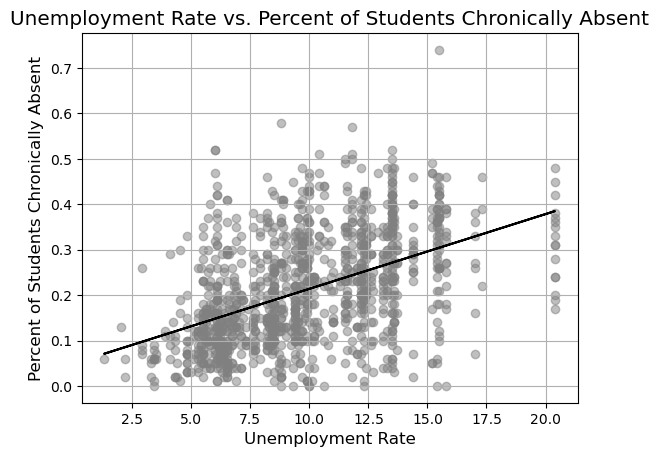

In [26]:
useful_variables8 = ['Unemployment Rate', 'Percent of Students Chronically Absent']

#clean unemployment column
absenteeism_unemployment_table[useful_variables8] = absenteeism_unemployment_table[useful_variables8].apply(pd.to_numeric, errors='coerce')
scatter_table = absenteeism_unemployment_table.dropna(subset=useful_variables8)

# Define variables
unemployment_values = scatter_table[useful_variables8[0]]
absent_values = scatter_table[useful_variables8[1]]

# Create line of best fit
coefficients = np.polyfit(unemployment_values, absent_values, 1)
line_of_best_fit = np.polyval(coefficients, unemployment_values)
plt.plot(unemployment_values, line_of_best_fit, color='black', label='Line of Best Fit')

# Create scatter plot
plt.scatter(unemployment_values, absent_values, color='gray', alpha=0.5)
plt.title('Unemployment Rate vs. Percent of Students Chronically Absent', fontsize ='x-large')
plt.xlabel('Unemployment Rate', fontsize = 'large')
plt.ylabel('Percent of Students Chronically Absent', fontsize = 'large')
plt.grid(True)
plt.show()

As seen in the graph above, the unemployment rate and chronic absenteeism show a positive relationship. It is to be noted that this graph uses the unemployment rate for the zip code that each school is located in rather than the unemployment rate for the families of each individual school. The reasoning for this is that there was no data available for unemployment at the school level. However, since most students go to school near where they live, it should give an accurate picture of employment conditions for families at each school (School Zones NYC311, n.d.). This positive relationship between unemployment and chronic absenteeism, with unemployed people having some of the highest amounts of economic need, supports the theory that economic factors significantly influence attendance patterns. Additionally, the unemployment rate only takes people sixteen or older into account. With the majority of schools serving at least some elementary and middle school grades, it means that a parent's employment status has a strong positive relationship with chronic absenteeism. This could mean that parents who are out looking for work do not have the time to ensure their children are attending school or that children take jobs that pay under the table in order to supplement their families income, at the expense of consistently attending school. 

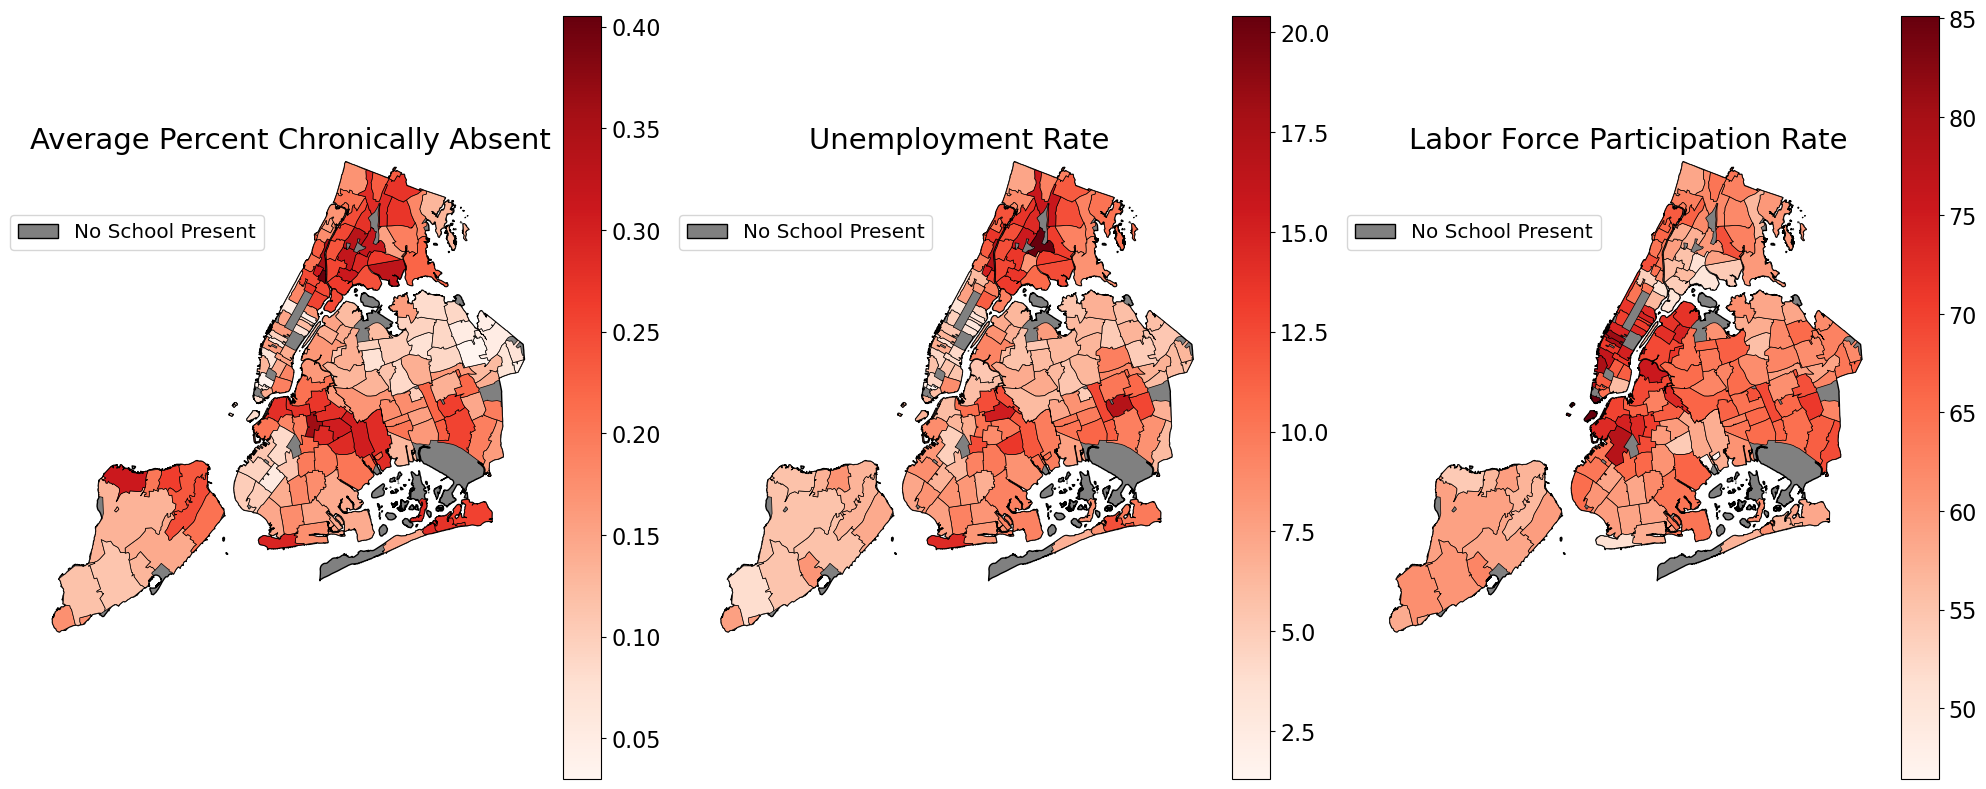

In [27]:
# Group by zip code for unemployment
zip_code_group_unemployment = scatter_table.groupby("Zip")["Unemployment Rate"].first().reset_index()
zip_code_group_unemployment['Zip'] = zip_code_group_unemployment['Zip'].astype(str)
nyc_zip_codes['ZCTA5CE10'] = nyc_zip_codes['ZCTA5CE10'].astype(str)
nyc_zip_codes_unemployment = pd.merge(nyc_zip_codes, zip_code_group_unemployment, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Group by zip code for labor force participation rate
zip_code_group_lb = scatter_table.groupby("Zip")["Labor Force Participation Rate"].first().reset_index()
zip_code_group_lb['Zip'] = zip_code_group_lb['Zip'].astype(str)
nyc_zip_codes_lb = pd.merge(nyc_zip_codes, zip_code_group_lb, left_on='ZCTA5CE10', right_on='Zip', how='left')
nyc_zip_codes_lb['Labor Force Participation Rate'] = pd.to_numeric(nyc_zip_codes_lb['Labor Force Participation Rate'], errors='coerce')

# Initialize plot
fig, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first map 
nyc_boroughs.plot(ax=ax1, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_absentee.plot(ax=ax1, column='Percent of Students Chronically Absent', legend=False, cmap='Reds', edgecolor='black', linewidth=0.5, legend_kwds={'shrink': 0.7})
ax1.set_xlim([-74.26, -73.69])
ax1.set_ylim([40.49, 40.92])
ax1.set_title("Average Percent Chronically Absent", fontsize=21)
ax1.axis("off")

# Add legend for the first map
legend_elements_absentee = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax1.legend(handles=legend_elements_absentee, loc='upper left', bbox_to_anchor=(-0.1, 0.9), fontsize='x-large')

# Create color bar for ax1
sm1 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_absentee2['Percent of Students Chronically Absent'].min(), vmax=nyc_zip_codes_absentee2['Percent of Students Chronically Absent'].max()))
cba1 = fig.colorbar(sm1, ax=ax1)
cba1.ax.tick_params(labelsize=16)

# Plot the third map
nyc_boroughs.plot(ax=ax3, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_unemployment.plot(ax=ax3, column='Unemployment Rate', legend=False, cmap='Reds', linewidth=0.5, edgecolor='black', legend_kwds={'shrink': 0.7})
ax3.set_xlim([-74.26, -73.69])
ax3.set_ylim([40.49, 40.92])
ax3.set_title("Unemployment Rate", fontsize=21)
ax3.axis("off")

# Add legend for the third map
legend_elements_unemployment = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax3.legend(handles=legend_elements_unemployment, loc='upper left', bbox_to_anchor=(-0.1, 0.9), fontsize='x-large')

# Add color bar for the third map
sm3 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_unemployment['Unemployment Rate'].min(), vmax=nyc_zip_codes_unemployment['Unemployment Rate'].max()))
cba3 = fig.colorbar(sm3, ax=ax3)
cba3.ax.tick_params(labelsize=16)

# Plot the second map 
nyc_boroughs.plot(ax=ax2, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_lb.plot(ax=ax2, column='Labor Force Participation Rate', legend=False, cmap='Reds', linewidth=0.5, edgecolor='black', legend_kwds={'shrink': 0.7})
ax2.set_xlim([-74.26, -73.69])
ax2.set_ylim([40.49, 40.92])
ax2.set_title("Labor Force Participation Rate", fontsize=21)
ax2.axis("off")

# Add legend for the second map
legend_elements_lb = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax2.legend(handles=legend_elements_lb, loc='upper left', bbox_to_anchor=(-0.1, 0.9), fontsize='x-large')

# Add color bar for the second map
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=nyc_zip_codes_lb['Labor Force Participation Rate'].min(), vmax=nyc_zip_codes_lb['Labor Force Participation Rate'].max()))
cba2 = fig.colorbar(sm2, ax=ax2)
cba2.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

As seen in the maps above, the unemployment rate shows a strong positive relationship with chronic absenteeism. The areas that have previously been shown to have large amounts of chronic absenteeism also have high unemployment rates. These areas include the Bronx, parts of West and Southern Brooklyn, and Queens. This would back up the theory that students with parents or guardians who do not have an income have to miss school in order to work to create income. Additionally, chronic absenteeism and the labor force participation rate are shown to have more of a negative relationship, which makes sense as the higher the labor force participation rate is the lower the unemployment rate will be in a zip code. However, there are some zip codes in West Brooklyn particularly that have high labor force participation rates yet high chronic absenteeism rates. This trend holds for the unemployment rate as well, with lower rates of unemployment in this area but high chronic absenteeism. Further research is needed to understand this trend as it does not have the same relationship that has been observed through the rest of the city. Such variables as the amount of school-aged children in the area and the amount of families that send their children to public versus private schools would be helpful in determining why the relationship is reversed for this area.

## Adding Another New Datset

In addition to adding the population to school ratio, this paper will be adding data on population density by zip code. This is different from the population to school ratio because it reflects the density of people by square mile instead of by school. The reasoning to add this is to understand, on average, how far students need to travel to get to school. If the population density is higher, then on average students might need to travel smaller distances to school. On the flip side, if the population density is lower, then on average students might need to travel larger distances to school. The distance people need to travel to school could be a factor in how often they attend school, due to the fact that traveling longer distances takes more time, effort, and often money.

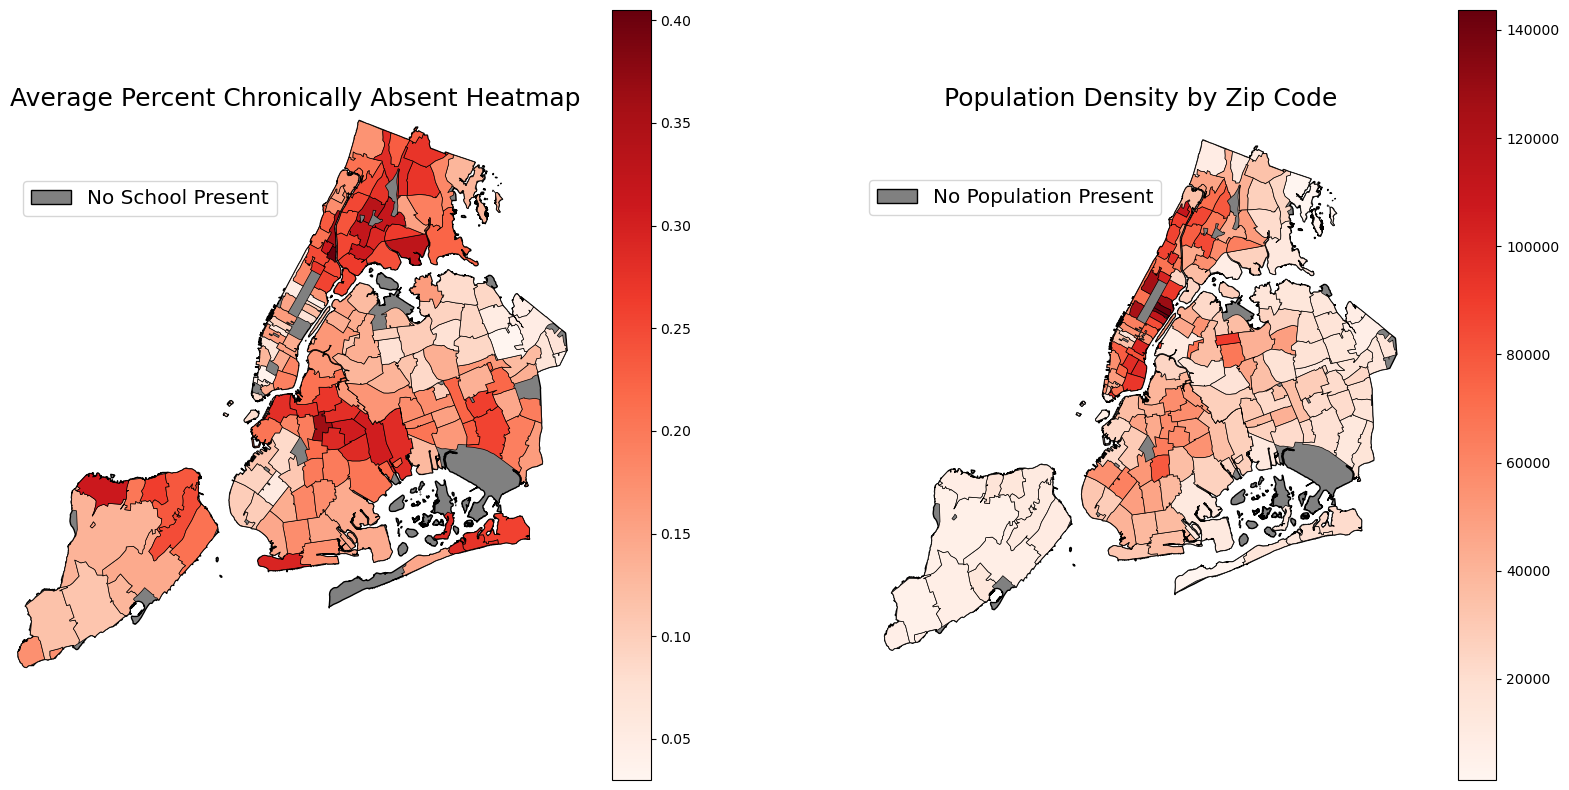

In [28]:
density_df = pd.read_csv('nyc_zip_borough_neighborhoods_pop.csv')

# Clean Data
density_df.rename(columns={'zip': 'Zip'}, inplace=True)
density_df['Zip'] = density_df['Zip'].astype(int)
density_df.rename(columns={'density': 'Density'}, inplace=True)
density_df['Density'] = density_df['Density'].astype(int)
density_df.rename(columns={'borough': 'Borough'}, inplace=True)
density_df = density_df[['Zip', 'Borough', 'Density']]
density_df = density_df[['Zip', 'Borough', 'Density']]
nyc_zip_codes['ZCTA5CE10'] = nyc_zip_codes['ZCTA5CE10'].astype('int64')

# Merge density_df with zip code shapefile
nyc_zip_codes_density = pd.merge(nyc_zip_codes, density_df, left_on='ZCTA5CE10', right_on='Zip', how='left')

# Plot the absenteeism map
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

nyc_boroughs.plot(ax=ax1, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_absentee2.plot(ax=ax1, column='Percent of Students Chronically Absent', legend=True, cmap='Reds', edgecolor='black', linewidth=0.5)
ax1.set_xlim([-74.26, -73.69])
ax1.set_ylim([40.49, 40.92])
ax1.set_title("Average Percent Chronically Absent Heatmap", fontsize=18)
ax1.axis("off")

#add legend
legend_elements_absentee1 = [Patch(facecolor='gray', edgecolor='black', label='No School Present')]
ax1.legend(handles=legend_elements_absentee1, loc='upper left', bbox_to_anchor=(0.0, 0.9), fontsize='x-large')

# Plot the population density map
nyc_boroughs.plot(ax=ax2, edgecolor="black", facecolor='gray', linewidth=1)
nyc_zip_codes_density.plot(ax=ax2, column='Density', cmap='Reds', edgecolor='black', linewidth=0.5, legend=True)
ax2.set_title('Population Density by Zip Code', fontsize=18)
ax2.set_axis_off()

#add legend
legend_elements_den = [Patch(facecolor='gray', edgecolor='black', label='No Population Present')]
ax2.legend(handles=legend_elements_den, loc='upper left', bbox_to_anchor=(0.0, 0.9), fontsize='x-large')

# Display the plot
plt.show() 

These maps show chronic absenteeism and population density in New York City. As seen in the maps, there is a subtle positive relationship between the two variables. This relationship is strongest in the South Bronx, Brooklyn, and Western Queens. However, this positive relationship goes against the theory that students who need to travel shorter distances will have lower rates of chronic absenteeism. Instead it shows that students who need to travel further come to school more often. One possible reason for this is that many wealthier families tend to move away from downtown to less dense suburbs, so this relationship could actually be another way of reflecting how income and economic need are related to chronic absenteeism.

# Project Four

## OLS Regressions

This project has shown there is a relationship between economic need and chronic absenteeism. Based on the scatterplot from earlier in this project showing economic need and chronic absenteeism's positive relationship, this relationship is most likely linear. One possible explanation for this is that people who face higher economic need encounter more difficulties in affording basic neccessities. This can lead to students being absent from school due to a lack of quality health insurance for medical treatment or because their parents must work more than others to make ends meet, which forces them not to be able to ensure their children attend school. This could lead to a linear relationship between economic need and chronic absenteeism, as the greater the average economic need for a school's students is, the higher the rates of chronic absenteeism will be. 

In [29]:
reg1 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=df[['Economic Need Index']],
             missing = 'drop')

results = reg1.fit()

stargazer = Stargazer([results])
stargazer.custom_columns(["Percent of Students Chronically Absent"],[1])
HTML(stargazer.render_html())

As shown above, this is a univariate regression with economic need index as the sole independent variable and chronic absenteeism as the dependent variable. This shows, without any controls, that for every one unit increase in the economic need index, chronic absenteeism increases by 0.318 units. This is relationship displays a relatively high level of correlation, as chronic absenteeism is a measure out of one. As such, this strong relationship further backs up prior findings, that economic need is one of the main factors in chronic absenteeism. One possible reason for this is that parents who have high economic need are forced to be at work and not able to supervise their children in order to ensure they attend school. 

In [30]:
full_table = pd.merge(unemployment_table, nyc_boro_pop_delay, on="Zip", how="inner", suffixes=('_unemployment', '_boro_pop_delay'))

full_table['Zip'] = full_table['Zip'].astype('int64')
full_table = pd.merge(full_table, density_df, on='Zip', suffixes=('_full_table1', '_density'))

df_cleaned = pd.merge(df, full_table, on="School Name", how='inner')
df_cleaned = df_cleaned.rename(columns={'Economic Need Index_x': 'Economic Need Index', 'Percent of Students Chronically Absent_x': 'Percent of Students Chronically Absent'})
df_cleaned['Bus Delays Above Average'] = (df_cleaned['Delays per Capita'] >= df_cleaned['Delays per Capita'].mean()).astype(int)
df_cleaned['ENI_bus_delays_interact'] = df_cleaned['Bus Delays Above Average'] * df_cleaned['Economic Need Index']

df_cleaned['Unemployment Rate'] = pd.to_numeric(df_cleaned['Unemployment Rate'], errors='coerce')
df_cleaned['Percent of Students Chronically Absent'] = pd.to_numeric(df_cleaned['Percent of Students Chronically Absent'], errors='coerce')
df_cleaned['Unemployment Rate'] = pd.to_numeric(df_cleaned['Unemployment Rate'], errors='coerce')
df_cleaned['Economic Need Index'] = pd.to_numeric(df_cleaned['Economic Need Index'], errors='coerce')
df_cleaned['bus_delays'] = pd.to_numeric(df_cleaned['Delays per Capita'], errors='coerce')
df_cleaned['Population Density'] = pd.to_numeric(df_cleaned['Density'], errors='coerce')

# Define the regression models
X1 = df_cleaned[['Economic Need Index', 'bus_delays']]
X2 = df_cleaned[['Economic Need Index', 'ENI_bus_delays_interact', 'bus_delays']]
X3 = df_cleaned[['Economic Need Index', 'ENI_bus_delays_interact', 'Unemployment Rate']]
X4 = df_cleaned[['Economic Need Index', 'ENI_bus_delays_interact', 'Unemployment Rate', 'Population Density']]

Y = df_cleaned['Percent of Students Chronically Absent']

# Add a constant term to X variables
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)

# Define the regression models
reg1 = sm.OLS(endog=Y, exog=X1, missing='drop')
reg2 = sm.OLS(endog=Y, exog=X2, missing='drop')
reg3 = sm.OLS(endog=Y, exog=X3, missing='drop')
reg4 = sm.OLS(endog=Y, exog=X4, missing='drop')

# Fit the regression models
results1 = reg1.fit()
results2 = reg2.fit()
results3 = reg3.fit()
results4 = reg4.fit()

# Create a Stargazer table
stargazer = Stargazer([results1, results2, results3, results4])
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4"], [1, 1, 1, 1])
HTML(stargazer.render_html())

These regressions were run to further understand the impact of economic indicators and school bus delays independently, as well as their combined impact on chronic absenteeism. The variables were chosen based on earlier findings that the Bronx had high levels of economic need, unemployment, population density, and school bus delays, along with chronic absenteeism. By combining these variables, these regressions reveal how much each of these variables impact chronic absenteeism and how they interact with each other to influence chronic absenteeism in the Bronx and elsewhere in New York City. 

The economic need index consistently shows a relationship of around 0.35 with the percentage of students chronically absent, even when adding various controls. This indicates that economic need continues to impact chronic absenteeism regardless of other variables being introduced. This makes sense, as it was established earlier that economic need has a significant relationship with chronic absenteeism. Interestingly, this table shows that in areas with a high rate of school bus delays, economic need is more of a significant indicator of chronic absenteeism. This is noted in the interaction variable called "ENI_bus_delays_interact" having a statistically significant positive relationship with chronic absenteeism in Model 2. Given that the Bronx exhibits high amounts of economic need and chronic absenteeism, this result is logical. This outcome could be due to the fact that transportation delays compound the impact of economic need on attendance, possibly because less wealthy areas have worse quality transportation infastructure.

Further, the table shows that school bus delays themselves, a measure of how long it takes to get to school, do not have a very significant relationship with chronic absenteeism. This is contarary to the previous theory that places with more delays have higher barriers of attending school, resulting in a higher chronic absenteeism rate. This lack of relationship is backed up by the lack of relationship shown between population density and chronic absenteeism, being used as a measure of how far and therefore how long it takes for a student to get to school. However, this must be looked at skeptically as the school bus delays statistic is by borough and not by school like economic need and chronic absenteeism. This could be skewing the results as school bus delays by borough could be capturing various infastructure development styles in specific areas of a borough and not the time it takes to get to school on a per school basis. The unemployment rate shows little relationship with chronic absenteeism, but it is more interesting that it does not affect the economic need index's relationship with chronic absenteeism very much, despite being a similar statistic. This reinforces the strong relationship between economic need and chronic absenteeism. The adjusted R squared for all of these regressions is around 0.43. While this means that the linear model is only accounting for around forty three percent of the variance in the outcome, it is still the best fit for the data as many non-linear models that have been used with the data yield significantly lower adjusted R squared and F statistic values.

In [31]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Create a variables for regression
df_copy['Math_below_Proficient'] = (df_copy['Average Math Proficiency'] < 3).astype(int)
df_copy['ELA_below_Proficient'] = (df_copy['Average ELA Proficiency'] < 3).astype(int)
df_copy['ENI_Math_Interact'] = df_copy['Economic Need Index'] * df_copy['Math_below_Proficient']
df_copy['ENI_ELA_Interact'] = df_copy['Economic Need Index'] * df_copy['ELA_below_Proficient']

# Define the first regression model 
X1 = df_copy[['Economic Need Index', 'Math_below_Proficient']]
Y1 = df_copy['Percent of Students Chronically Absent']
X1 = sm.add_constant(X1)
reg1 = sm.OLS(endog=Y1, exog=X1, missing='drop')
results1 = reg1.fit()

# Define the second regression model
X2 = df_copy[['Economic Need Index', 'Math_below_Proficient', 'ELA_below_Proficient']]
Y2 = df_copy['Percent of Students Chronically Absent']
X2 = sm.add_constant(X2)
reg2 = sm.OLS(endog=Y2, exog=X2, missing='drop')
results2 = reg2.fit()

#define 3rd regression model
X3 = df_copy[['Economic Need Index', 'Average Math Proficiency', 'Average ELA Proficiency', 'ENI_Math_Interact']]
Y3 = df_copy['Percent of Students Chronically Absent']
X3 = sm.add_constant(X3)
reg3 = sm.OLS(endog=Y3, exog=X3, missing='drop')
results3 = reg3.fit()

#define last model
X4 = df_copy[['Economic Need Index', 'Average Math Proficiency', 'Average ELA Proficiency', 'ENI_Math_Interact', 'ENI_ELA_Interact']]
Y4 = df_copy['Percent of Students Chronically Absent']
X4 = sm.add_constant(X4)
reg4 = sm.OLS(endog=Y4, exog=X4, missing='drop')
results4 = reg4.fit()

# visualize regressions
stargazer = Stargazer([results1, results2, results3, results4])
stargazer.custom_columns(["Model 1", "Model 2","Model 3", "Model 4"], [1, 1, 1, 1])
HTML(stargazer.render_html())

To further understand the effect of academic performance on chronic absenteeism, this regression table includes the independent variables of both math and ELA proficiencies, the economic need index, and interaction variables created from these statistics. These regressions were run because earlier in the project, the determination was made that underperforming academic schools showed higher rates of chronic absenteeism. Additionally, places with both high economic need and underperforming schools generally had even higher chronic absenteeism. To determine which of these variables and their combined effects have the most impactful relationship with chronic absenteeism, these regressions were performed.

As seen in the table above, the economic need index's relationship with chronic absenteeism changes when there are more controls added in. Specifically, it gets lower when ELA and math proficiency get added in. This suggests that when controlling for academic success, economic need does not explain chronic absenteeism as well. However, it is important to note that there is a potential for reverse causality in both the math and ELA proficiency variables. When a student misses class, they are missing learning time where they could have improved their testing scores, meaning that chronic absenteeism itself could also be impacting academic success. With this in mind, we must look cautiously at all correlative relationships determining academic success as a factor of chronic absenteeism. Additionally, when a school is below proficient by New York State standards, represented by math_proficiency_below_3 on the regression table, there is a small negative correlation between it and chronic absenteeism. This would go against the theory that students with higher academic achievement are more motivated to attend school and in fact would suggest the opposite. However, this coefficient is small meaning that the relationship is not very impactful. Average ELA proficiency shows a positive relationship with chronic absenteeism, which would go against the theory of more motivated students attending school more. This could possibly be explained by the reverse causality discussed earlier. On the other hand, math proficiency shows a small negative relationship, which would suggest that chronic absenteeism is more common in places that have lower math test scores. These measures of academic success and their relationships with chronic absenteeism are interesting as the only difference between them is the school subject their test scores were obtained from. This opens the door for scientific research to be done on the behavior of people who are better at math or reading and the effect on school or work attendance. 

Lastly, the interaction variables show varying degrees of statistical significance based on the model. The interaction variable that reflects English standardized test scores below proficient and economic need show a negative relationship with chronic absenteeism. This means that while economic need increases, chronic absenteeism increases at a slower rate or decreases for schools with test scores below proficient. This is interesting, as it reflects that in schools with students who have lower test scores, economic need is not as big of an indicator of chronic absenteeism. This could be because lower test scores are caused by other socio economic factors that also influence chronic absenteeism, but are not included in this project. Further research involving more socio economic indicators could help illuminate this finding. The math and economic need interaction terms are created similarly to the english ones, but are not statistically significant. Interestingly, this suggests that in schools with low ELA proficiency, economic need has little relationship with chronic absenteeism. Lastly, the linear model is shown to have a better fit for the data when these interaction variables are included based on those models' higher adjusted R squared value. This means that the interaction terms have helped explain chronic absenteeism, albeit indirectly through their status as a control variable.

In [40]:
# Define the regression models
models = []

# Model 1: Economic Need Index + Trust %
X2 = df[['Economic Need Index', 'Trust %']]
X2 = sm.add_constant(X2)
reg2 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=X2, missing='drop')
results2 = reg2.fit()
models.append(results2)

# Model 2: Economic Need Index + Strong Family-Community Ties %
X1 = df[['Economic Need Index', 'Strong Family-Community Ties %']]
X1 = sm.add_constant(X1)
reg1 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=X1, missing='drop')
results1 = reg1.fit()
models.append(results1)

# Model 3
average_ENI = df['Economic Need Index'].mean()
df.loc[df['Economic Need Index'] > average_ENI, 'ENI_Above_Average'] = 1
df.loc[df['Economic Need Index'] <= average_ENI, 'ENI_Above_Average'] = 0
X4 = df[['ENI_Above_Average', 'Trust %']].copy()
X4 = sm.add_constant(X4)
reg4 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=X4, missing='drop')
results4 = reg4.fit()
models.append(results4)

# Model 4
average_ENI = df['Economic Need Index'].mean()
df.loc[:, 'ENI_Above_Average'] = 0  # Initialize the column with zeros
df.loc[df['Economic Need Index'] > average_ENI, 'ENI_Above_Average'] = 1 
df.loc[:, 'ENI_trust_Interact'] = df['ENI_Above_Average'] * df['Trust %']  # Use .loc to avoid SettingWithCopyWarning
X3 = df[['Economic Need Index', 'Trust %', 'ENI_trust_Interact']].copy()
X3 = sm.add_constant(X3)
reg3 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=X3, missing='drop')
results3 = reg3.fit()
models.append(results3)

# Model 5 - all the numbers on results are off - just due to rearrangement of models on table
X5 = df[['Economic Need Index', 'Trust %', 'Strong Family-Community Ties %']]
X5 = sm.add_constant(X5)
reg5 = sm.OLS(endog=df['Percent of Students Chronically Absent'], exog=X5, missing='drop')
results5 = reg5.fit()
models.append(results5)

# Display the regression results using Stargazer
stargazer = Stargazer(models)
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"], [1, 1, 1, 1, 1])
HTML(stargazer.render_html())

In order to understand the relationship between community ties ratings, economic need, and chronic absenteeism, this regression includes independent variables representing the economic need index, the degree of community connections within a school, and the level of trust a community has in a school. These regressions were run because higher levels of community engagement have been shown to help chronic absenteeism (Sheldon & Epstein, 2004), and understanding the extent of their relationship can aid in providing a framework on how much resources to put into increasing community engagement in public schools. It is important to note that the Strong Family-Community Ties % and Trust % were compiled via survey, meaning there might be bias in the data due to people only responding if they already felt a high level of community engagement and trust within a school. 

As seen in the table above, the economic need index consistently has a coefficient of around 0.35, as seen in the second regression table. The coefficient for the economic need index staying relatively consistent throughout all of these regressions means that even when introducing various control variables, the economic need index has a strong relationship with chronic absenteeism. This makes sense, as previously in the project there was a strong relationship shown through maps and a scatterplot. Interestingly, when turned into a dummy variable measuring if a school has above average economic need, economic need shows an even stronger relationship. This means that schools with students with above average economic need have chronic absenteeism rates of more than ten percent higher than schools with students that have below average economic need. This backs up the theory that parents of students with very high economic need might have time constraints forcing them to be away from their child, unable to ensure they attend school. 

Further, Trust % shows a consistently strong relationship with chronic absenteeism, even when controls are introduced. This relationship is negative, which makes sense as high levels of trust in a school can entice students to want to be there. This backs up Sheldon and Epstein's findings that community engagement is crucial in curbing chronic absenteeism (Sheldon & Epstein, 2004). However, the strong family-community ties % shows a positive relationship in the only model it is statistically significant in. This would suggest that the more community ties a school has the more the chronic absenteeism rate is predicted to be. Further research could aid in understanding why trust % and strong family-community ties % offer differing influences on chronic absenteeism. A larger sample size could help show that both have a negative relationship instead, because trust %'s consistent influence on chronic absenteeism despite controls suggests that this data could be giving false results. "ENI_trust_interact", an interaction variable that is calculated by multiplying the ENI_above_average variable with trust percentage shows no statistically significant relationship with chronic absenteeism. This is interesting because it means that trust % in schools with high economic need is not a significant factor in chronic absenteeism. This could possibly be because community ties for a school are generally lower for schools with higher amounts of economic need (Winston-Prosper, 2018), further bolstering the idea that trust percentage is a strong factor in chronic absenteeism. Lastly, it should be noted that the adjusted R squared values in all models are relatively consistent, except for model 3, which also has the lowest F statistic. This suggests that model 3 fits the data the worst and coefficients obtained from that regression should be looked at cautiously for determining correlative relationships.

### Preferred Regression Equation

$$ Y_i = \beta_0 + \beta_1\text{Economic Need Index} + \beta_2\text{ENI_Bus_Delays_Interact} + \beta_3\text{Bus_Delays} + \epsilon_i $$

Above is the regression function for the chosen regression. It is model 2 in regression table 2. This function displays that chronic absenteeism is the dependent variable, with $β_{0}$ representing the Y intercept for the function. This means that $β_{0}$ is the baseline level of chronic absenteeism without any other variables present. $β_{1}$ is the coefficient representing how much chronic absenteeism will change with a one unit increase in the economic need index. $β_{2}$ is the coefficient representing how much chronic absenteeism will change with a one unit increase in the interaction variable. This interaction variable is derived by multiplying the economic need index with the dummy variable "Bus Delays Above Average", which indicates if there is above average bus delays in the area the school serves. This reflects the extra effect economic need has on chronic absenteeism in places with high amounts of transportation delays. It is an informative variable as there are some areas of New York City that have high economic need and school bus delays, that also show very high levels of chronic absenteeism. The positive coefficient $β_{2}$ indicates that the combined impact of transportation delays and economic need is more significant in influencing chronic absenteeism compared to each variable's individual effect. $β_{3}$ is the coefficient representing how much chronic absenteeism will change with a one unit increase in the amount of school bus delays.

## Machine Learning

### Objective Function

At every node of a regression tree, the computer chooses a feature and location to split on. These are chosen to minimize the sum of square differences, creating the best fit for the regression. This means that each location and feature the computer chooses minimizes the amount of difference between the predicted amount of chronic absenteeism from the regression and the actual amount of chronic absenteeism. In doing so, the computer is optimizing the regression to the data. The equation that the computer solves to minimize the sum of square differences and choose the feature and location to split on is as follows:

$$
\min_{\beta_0, \beta_1, \beta_2, \beta_3} \left[ \sum_{i=1}^{n} \left( \text{Percent of Students Chronically Absent}_i - (\beta_0 + \beta_1\text{Economic Need Index}_i + \beta_2\text{ENI_Bus_Delays_Interact}_i + \beta_3\text{Bus_Delays}_i) \right)^2 \right]
$$

In this equation, coefficients $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are the paramters of the regression model, used to predict chronic absenteeism at the ith point. This predicted value is subtracted from actual chronic absenteeism at the ith point and being squared, giving us the squared difference of the prediction error. All of this is summed, then the computer minimizes this to provide a model that is most correctly fitted to the data.

By minimizing the sum of squared differences, the machine learning algorithm aims to create a regression tree model that fits the data well. However, there is a risk of overfitting, where  the model captures noise in this specific dataset so well that it cannot be generalized to larger datasets. To prevent this from happening, regularization parameters are specified. The main regularization parameter being used in the following regression is the limiting of the depth of the regression tree to three. This stops the machine from making too many splits to complicate and overfit the model to the noise in this specific dataset. In further work, other regularization parameters such as lasso and ridge regularization can help to further ensure that the machine learning algorithm does not overfit the model to the data.

### Regression Tree for the Preferred Regression Function

In [33]:
X_tree = df_cleaned[['Economic Need Index', 'ENI_bus_delays_interact', 'bus_delays']]
y = df_cleaned['Percent of Students Chronically Absent']
X_tree.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

absenteeism_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_tree, y)
y_pred_tree = absenteeism_tree.predict(X_tree)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 0.007438726879531032


The mean squared error of this tree is relatively low, suggesting the decision tree is fairly accurately predicting chronic absenteeism using the economic need index, school bus delays per capita, and the interaction term between these two variables that represents the amount of economic need in areas of high school bus delays per capita. However, such a low mean squared error could be suggestive of an overfit the model, making it difficult to generalize the results. This potential problem can be fixed in the future with more tuning of other regularization parameters of the machine learning model. 

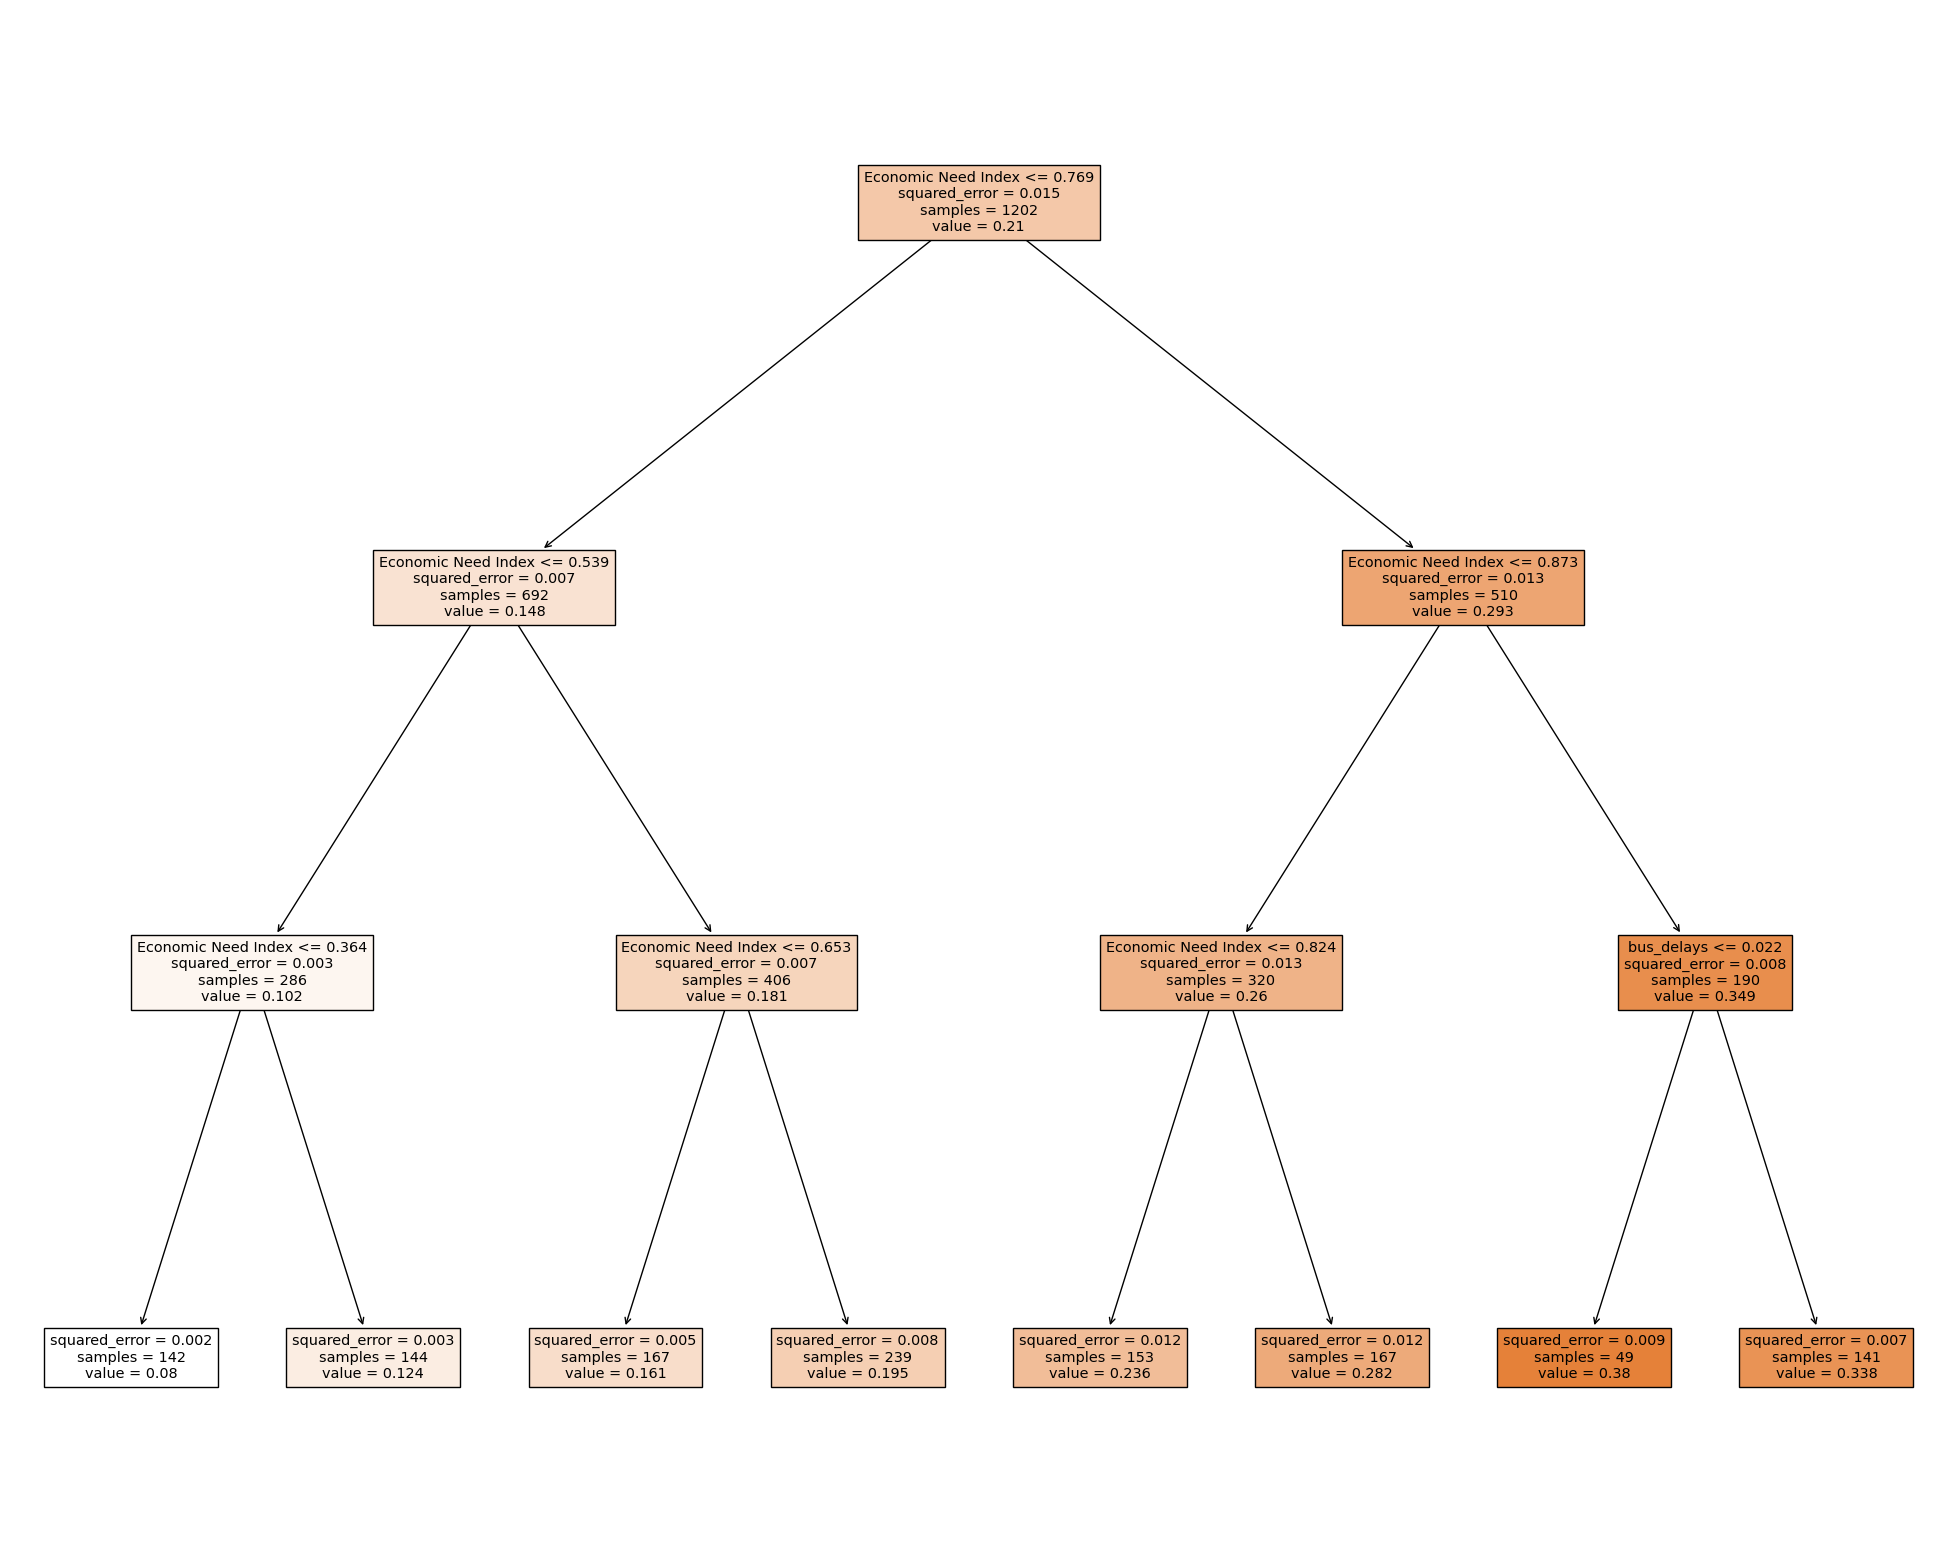

In [34]:
absenteeism_fig = plt.figure(figsize=(25,20))
absenteeism_fig = tree.plot_tree(absenteeism_tree, feature_names=X_tree.columns, filled=True)

This regression tree splits primarily on the economic need index, indicating that the machine learning algorithm has identified this factor as being the most influential on chronic absenteeism. The tree illustrates that as economic need increases, its relationship with chronic absenteeism becomes greater, meaning that economic need is a greater factor in chronic absenteeism at higher levels. Moreover, the tree reveals that in places with high economic need and low amount of school bus delays per capita, there is a greater amount of predictive power for chronic absenteeism. However, the amount of samples is low at 49, making it difficult to conclusively say this is the case. Conversely, in places with high economic need and high school bus delays per capita, there is a significantly larger amount of explanatory power for chronic absenteeism compared to nodes that do not include school bus delays per capita. Given the fact that there is almost one hundred more observations compared to the node with lower school bus delays per capita, it is reasonable to conclude that the combined influence of school bus delays per capita and economic need has a stronger relationship with chronic absenteeism than either variable alone. A larger dataset, perhaps of schools across the United States instead of just New York City could aid in further understanding this relationship.

### Regression Tree for All Variables 

In addition to the regression tree shown above that only includes variables from the preferred regression, an additional tree will be created including all independent variables explored in this project. This will enable the computer to determine what the most important factors are in chronic absenteeism. 

In [35]:
crime_precincts = merged_data[['precinct', '2016']]
crime_precincts.loc[:, 'precinct'] = crime_precincts['precinct'].astype(int)
crime_precincts = crime_precincts.rename(columns = {'2016': 'Violent Crime'})

# Create a dictionary mapping precinct numbers to boroughs
borough_map = {
    'Manhattan': list(range(1, 35)),
    'The Bronx': list(range(40, 53)),
    'Brooklyn': list(range(60, 95)),
    'Queens': list(range(100, 116)),
    'Staten Island': list(range(120, 124))
}

# Function to map precinct numbers to boroughs
def map_precinct_to_borough(precinct):
    for borough, precincts in borough_map.items():
        if precinct in precincts:
            return borough
    return 'Unknown'  # Handle precinct numbers not in the defined ranges

# Apply the function using .loc to create the 'Borough' column
crime_precincts.loc[:, 'Borough'] = crime_precincts['precinct'].apply(map_precinct_to_borough)

#rename Bronx in average crime by borough dataframe
average_crime_by_borough = crime_precincts.groupby("Borough")["Violent Crime"].mean().reset_index()
average_crime_by_borough["Borough"] = average_crime_by_borough["Borough"].replace("The Bronx", "Bronx")

#merge dataframes
df_cleaned = pd.merge(df_cleaned, average_crime_by_borough, on='Borough')

# Assuming X_tree1 and y_1 are defined and data is ready
df_cleaned = df_cleaned.rename(columns={'Average Math Proficiency_x': 'Average Math Proficiency', 
                                        'Average ELA Proficiency_x': 'Average ELA Proficiency', 'Trust %_x': 'Trust %', 'Strong Family-Community Ties %_x': 'Strong Family-Community Ties %', 'Violent Crime_x': 'Violent Crime', 'Delays per Capita': 'School Bus Delays per Capita' 
                                    })
X_tree1 = df_cleaned[['Economic Need Index', 'Population Density', 'Unemployment Rate', 'School Bus Delays per Capita', 'Population', 'Strong Family-Community Ties %', 'Trust %', 'Average ELA Proficiency', 'Average Math Proficiency', 'Labor Force Participation Rate', 'Employment/Population Ratio', 'Violent Crime' ]]
y_1 = df_cleaned['Percent of Students Chronically Absent']

# Resetting index for both X and y
X_tree1.reset_index(drop=True, inplace=True)
y_1.reset_index(drop=True, inplace=True)

# Training the decision tree regressor
absenteeism_tree_full = tree.DecisionTreeRegressor(max_depth=3).fit(X_tree1, y_1)

# Making predictions
y_pred_tree_full = absenteeism_tree_full.predict(X_tree1)

# Calculating Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_1, y_pred_tree_full))

Mean Squared Error: 0.005546143041974538


As seen above, the mean sqared error is a very small number for this regression tree. This means that the regression tree model is predicting chronic absenteeism relatively accurately using all of the independent variables included in this project. However, the high prediction accuracy raises a concern about potential overfitting of the model. The model might be too tailored to the data it was trained on, limiting its ability to be generalized to new, unseen data. In the future, further tuning of the regularization parameters can ensure the model is not overfitted. 

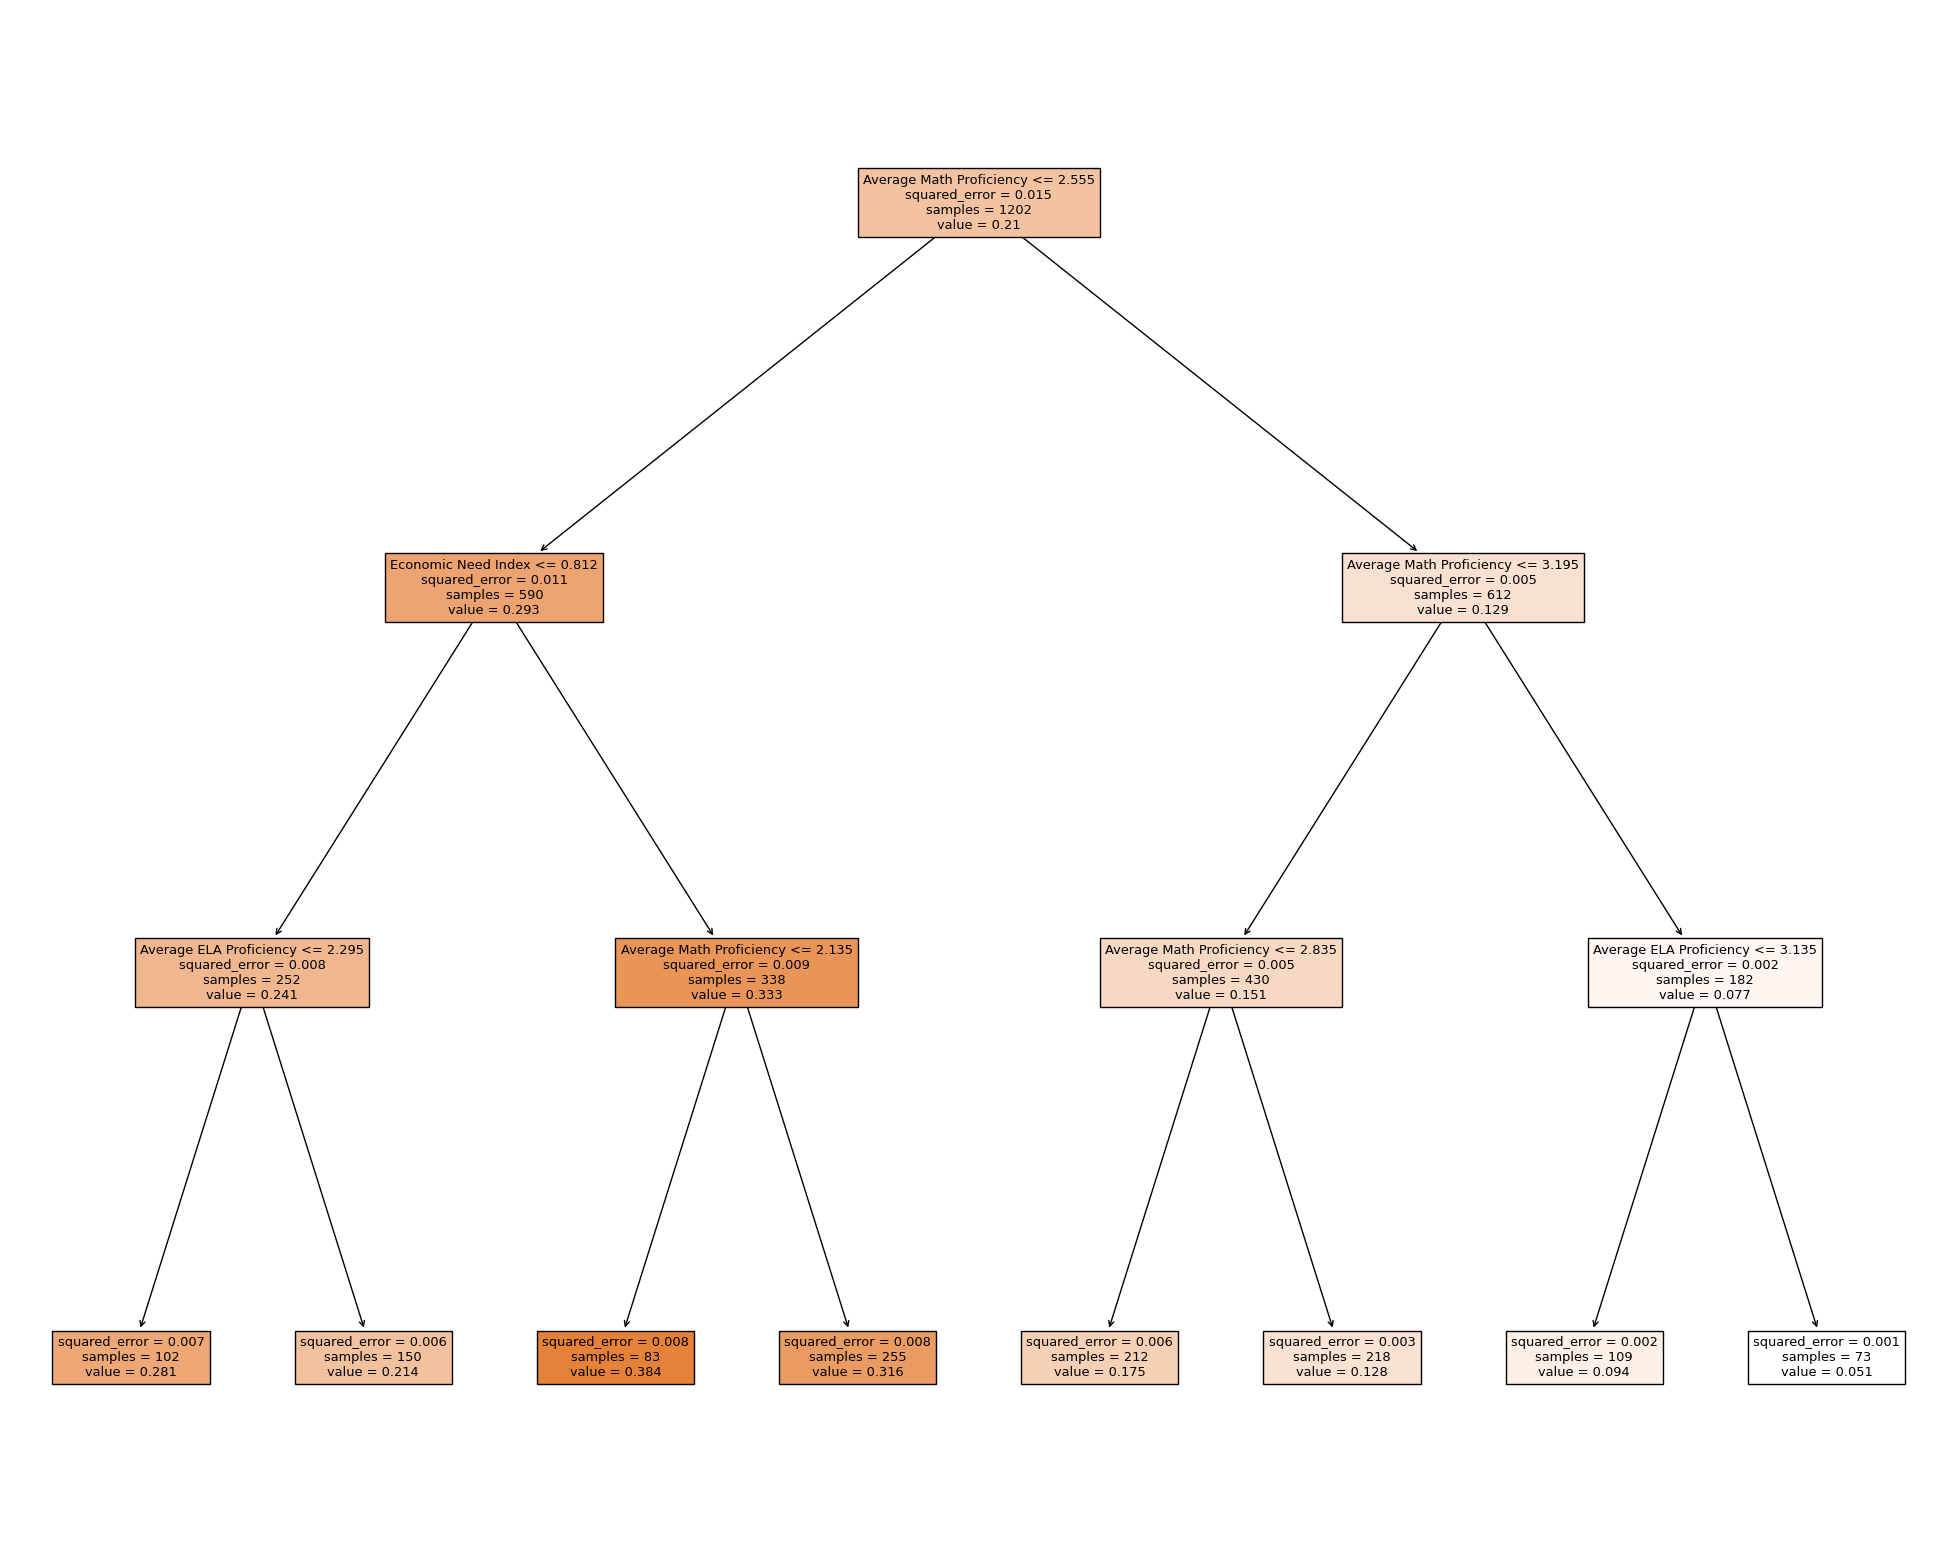

In [36]:
absenteeism_fig1 = plt.figure(figsize=(25,20))
absenteeism_fig1 = tree.plot_tree(absenteeism_tree_full, feature_names=X_tree1.columns, filled=True)

As seen above, this regression tree includes all of the independent variables explored in this project. As such, the tree reveals only the most important factors in predicting chronic absenteeism and identifies optimal split points to minimize the sum of squared errors and fit the model to the data. This tree shows that math and ELA proficiency are among the most important factors when determining chronic absenteeism. However, the machine learning algorithm does not realize that these variables have the potential to have a reverse causality effect, where students that are chronically absent and miss crucial learning at school will have reduced Math and English Language Arts proficiency. The next most important variable the tree shows as having a significant correlative relationship with chronic absenteeism is economic need. The tree shows that schools who have relatively high economic need and lower math proficiency have the largest correlative relationship with chronic absenteeism. Moreover, even with the many control variables in this regression tree, it is clear that chronic absenteeism is more affected by economic need at higher levels of economic need. This further backs up the theory that students who have parents that have high levels of financial hardship are working often, not being able to supervise their children and ensure they attend school.

### Random Forest Model & The Importance Matrix

A random forest model is a type of machine learning method that uses multiple decision trees, each trained on a specific subset of the data. Then the algorithm averages all of these predictions to arrive at the final output. Visualized below, the importance matrix shows the most important factors influencing chronic absenteeism explored in this project, compiled through a random forest model.

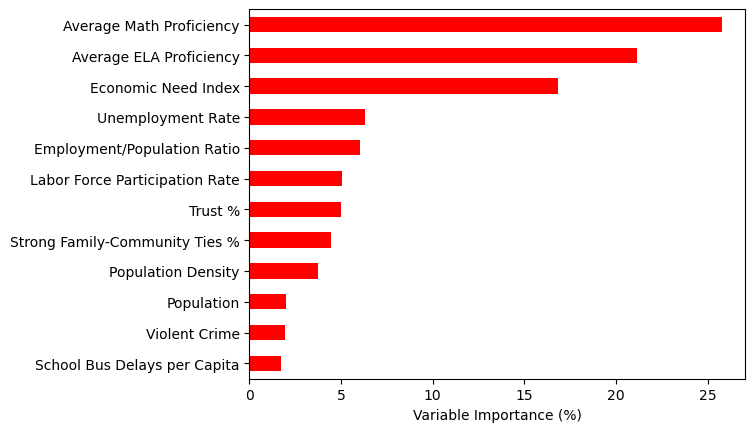

In [37]:
regr_RF = RandomForestRegressor(max_features=2, random_state=1).fit(X_tree1, y_1)

#predict
pred = regr_RF.predict(X_tree1)

Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=X_tree1.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance (%)')
plt.gca().legend_ = None

As the importance matrix above shows, math and ELA proficiency play the most important role among all the independent variables explored in this project. However, this is most likely due to a reverse causality effect, where students that are chronically absent missing vital learning time, reducing their math and ELA test scores. As such, the fact that the computer displays these as the independent variables with the most importance in predicting chronic absenteeism should be taken with caution. Instead, the next most important variable determined by the computer in predicting chronic absenteeism is the economic need index, followed by a couple of variables that also capture a measure of income. This further suggests that a student's wealth status is one of the most important factors in chronic absenteeism. Next, the matrix shows that Trust and strong-family community ties percentage, two measures of the school's community engagement, play a role in predicting chronic absenteeism. However, this should be looked at cautiously as the data on these two variables was collected through a survey, meaning the people who responded might already be more inclined to engage with the school. Lastly, the matrix shows that population density, violent crime, and school bus delays do not play a very significant role in predicting chronic absenteeism. However, this should be looked at skeptically as violent crime and school bus delays per capita were compiled on the borough level rather than by zip code. Further research could find this data on the zip code level to understand their relationship with more detailed data.

### Regression vs. Machine Learning Results

In the regression trees, it was shown that the economic need index was the most important factor in chronic absenteeism. This was similar to the OLS regression results, as in those the coefficient was consistently around 0.3 to 0.4, even when controls were added. Analyzing the regression tree, it was found that when economic need levels exceeded 0.824, a one unit change in economic need resulted in more than a twenty eight percent change in chronic absenteeism. This indicates that economic need has a stronger relationship with chronic absenteeism at higher levels of finanical hardship. This backs up the theory that parents of students who have high economic need cannot be there to supervise their children and ensure they attend school, because they are working. Additionally, machine learning displayed how academic proficiency is an even more important factor in chronic absenteeism than the OLS regression results suggested. It is shown that math proficiency explains around 25% of chronic absenteeism and ELA proficiency explains 20%. However, as discussed before, these results must be looked at cautiously because of their potential for reverse causality. Given how significant the machine learning model determined academic proficiency to be and its potential for reverse causality, future research should incorporate causal analysis. This will aid in the understanding of whether the importance matrix results indicate that academic proficiency influences chronic absenteeism or if chronic absenteeism influences academic proficiency. 

## Conclusion

Chronic absenteeism can have numerous negative effects on students including social and academic challenges. Understanding the factors that contribute to chronic absenteeism is therefore crucial in helping students overcome these obstacles. The data has shown that higher rates of chronic absenteeism is linked to numerous factors such as economic need, school district, unemployment, and school level. The strongest relationship explored so far is how in schools that serve students with higher economic need there is greater amounts of chronic absenteeism. Other covariates that show relationships with chronic absenteeism include the borough in which the school district is located, grade level of students, and population density. Population density and borough have shown relationships that further back up economic need being a main factor in chronic absenteeism. This is because lower income boroughs show higher amounts of economic need and places with lower population density, which also show low income, reflect low chronic absenteeism percentages. The school to population ratio reflected a negative relationship, possibly suggesting that larger schools use funds in a way that combats chronic absenteeism more effectively than smaller schools. Crime was shown not to have a relationship with chronic absenteeism. This could possibly mean that the socioeconomic factors that contribute to crime are not the same as the ones that contribute to chronic absenteeism. Regression analysis revealed that economic need is among the most important factors in chronic absenteeism. Additionally, it revealed that economic need in places that have high amounts of bus delays is significantly higher, suggesting a confounding relationship between the two and chronic absenteeism. 

Going forward, gathering data that reflects the percentages of residents that send their children to public versus private schools would help with understanding the economic need variable. If families in a certain zip code send their children to private school at a higher rate, then it would be more clear why the economic need index for public school students is so high. Additionally, national data instead of just city-level data would be helpful in analyzing the factors that impact chronic absenteeism. A larger dataset will allow us to say with more certainty which factors influence chronic absenteeism. Lastly, population and crime data at a lower granularity would aid in the understanding of how these variables affect chronic absenteeism. If available at the school level, this data can reveal localized relationships with chronic absenteeism and allow for more certainty in predicting which factors influence chronic absenteeism. With this information and the other variables introduced thus far, we can further explore which factors influence chronic absenteeism through advanced statistical analysis methods in the future.

## Bibliography

PASSNYC. (2016). 2016 School Explorer. PASSNYC.

NYPD. (2016). seven-major-felony-offenses. NYPD.

NYPD. (2016). non-seven-major-felony-offenses. NYPD.

U.S. Census Bureau. (2016). Selected Economic Statistics. U.S. Department of Commerce. Retrieved March 20, 2022, from https://data.census.gov/table?q=unemployment&g=040XX00US36$8600000

What We Do. (n.d.). PASSNYC. Retrieved March 1, 2024, from http://www.passnyc.org/what-we-do

Winters, M. A., & Cowen, J. M. (2012). Grading New York: Accountability and student proficiency in America’s     largest school district. Educational Evaluation and Policy Analysis, 34(3), 313-327.

Balfanz, R., & Byrnes, V. (2013). Meeting the challenge of combating chronic absenteeism. Everyone Graduates Center at Johns Hopkins University School of Education, 1-2.

Gottfried, M. A. (2014). Chronic absenteeism and its effects on students’ academic and socioemotional outcomes. Journal of Education for Students Placed at Risk (JESPAR), 19(2), 53-75.

US Department of Education. (n.d.). Chronic Absenteeism in the Nation’s Schools. https://www2.ed.gov/datastory/chronicabsenteeism.html 

New Directions Secondary School - District 9. (n.d.). Insideschools.org; Inside Schools. Retrieved February 29, 2024, from https://insideschools.org/school/09X350

Imran, M., Hosen, M., & Chowdhury, M. A. F. (2018). Does poverty lead to crime? Evidence from the United States of America. International Journal of Social Economics, 45(10), 1424-1438.

Pyrooz, D. C., & Sweeten, G. (2015). Gang membership between ages 5 and 17 years in the United States. Journal of Adolescent Health, 56(4), 414-419.

Kiani, C., Otero, K., Taufique, S., & Ivanov, I. (2018). Chronic absenteeism: a brief review of causes, course and treatment. Adolescent Psychiatry, 8(3), 214-230.

Stempel, H., Cox-Martin, M., Bronsert, M., Dickinson, L. M., & Allison, M. A. (2017). Chronic school absenteeism and the role of adverse childhood experiences. Academic pediatrics, 17(8), 837-843.

School Zones · NYC311. (n.d.). Portal.311.Nyc.gov. Retrieved March 19, 2024, from https://portal.311.nyc.gov/article/?kanumber=KA-02991#:~:text=Most%20public%20elementary%20school%20students

Patnode, A. H., Gibbons, K., & Edmunds, R. (2018). Attendance and chronic absenteeism: Literature review. Central for Applied Research and Educational Improvement, 1-55.

New York City Federal Reserve. (n.d.). New York City School Spending Per Student. New York City School spending per student - Federal Reserve Bank of New York. https://www.newyorkfed.org/data-and-statistics/data-visualization/nyc-school-spending#interactive/map 

Sheldon, S. B., & Epstein, J. L. (2004). Getting students to school: Using family and community involvement to reduce chronic absenteeism. School Community Journal, 14(2), 39-56.

Winston-Prosper, O. (2018). Building Trust and Strong Family-community Ties in the Face of Poverty and Homelessness. Sage Graduate School.